In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split

# About the Data
|      **Feature Name**      |               **Description**               |
|:--------------------------:|:-------------------------------------------:|
| person_age                 | Age                                         |
| person_income              | Annual Income                               |
| person_home_ownership      | Home ownership                              |
| person_emp_length          | Employment length (in years)                |
| loan_intent                | Loan intent                                 |
| loan_grade                 | Loan grade                                  |
| loan_amnt                  | Loan amount                                 |
| loan_int_rate              | Interest rate                               |
| loan_status                | Loan status (0 is non default 1 is default) |
| loan_percent_income        | Percent income                              |
| cb_person_default_on_file  | Historical default                          |
| cb_preson_cred_hist_length | Credit history length                       |

In [2]:
df = pd.read_csv("../data/raw/credit_risk_dataset.csv")
display(df.head())
display(df.info())
display(df.describe())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Exploratory Data Analysis

## Univariate Analysis

### Target Proportion

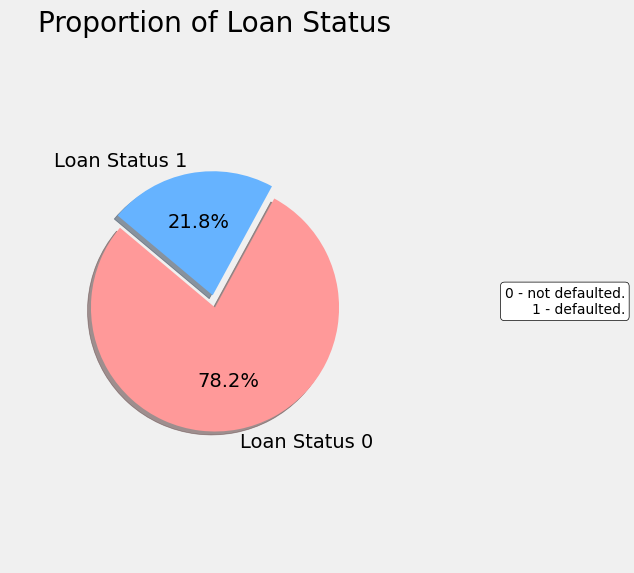

In [6]:
plt.style.use('fivethirtyeight')

# Count the values of "loan_status"
loan_status_counts = df["loan_status"].value_counts()

# Create labels and sizes for the pie chart
labels = ["Loan Status 0", "Loan Status 1"]
sizes = [loan_status_counts[0], loan_status_counts[1]]
colors = ["#ff9999","#66b3ff"]
explode = (0.1, 0)  # explode the 1st slice (Loan Status 0)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Proportion of Loan Status")

# Add annotation
annotation = (
    "0 - not defaulted.\n"
    "1 - defaulted."
)
plt.annotate(annotation, xy=(1, 0.5), xytext=(1.5, 0.5),
    textcoords="axes fraction", ha="right", va="center", fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
)

# Show the plot
plt.tight_layout()
plt.show()


### Missing Values

In [125]:
# Calculate the count of missing values in each column
missing_values_count = df.isna().sum()
missing_values_count / len(df) * 100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

### Numerical

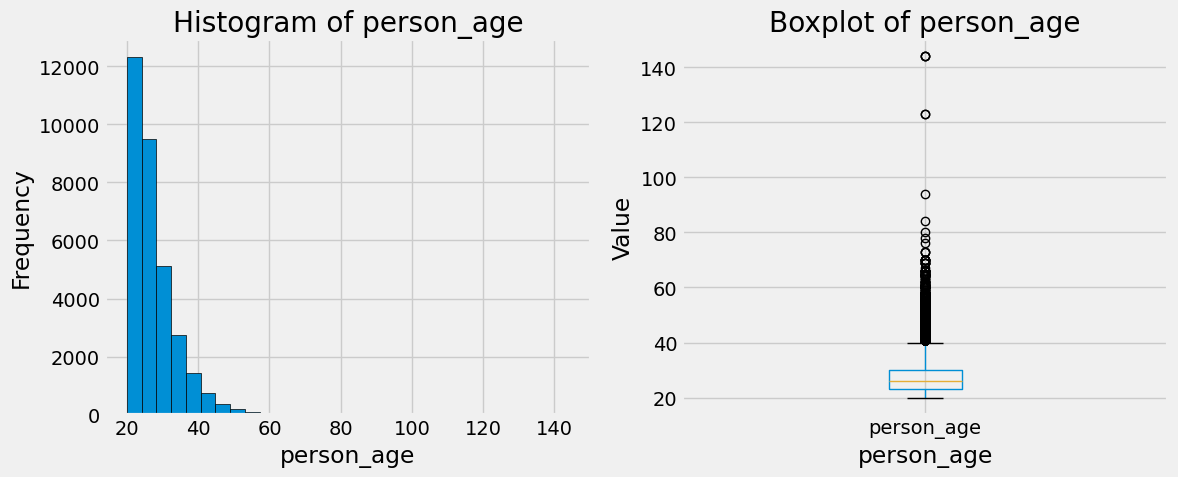

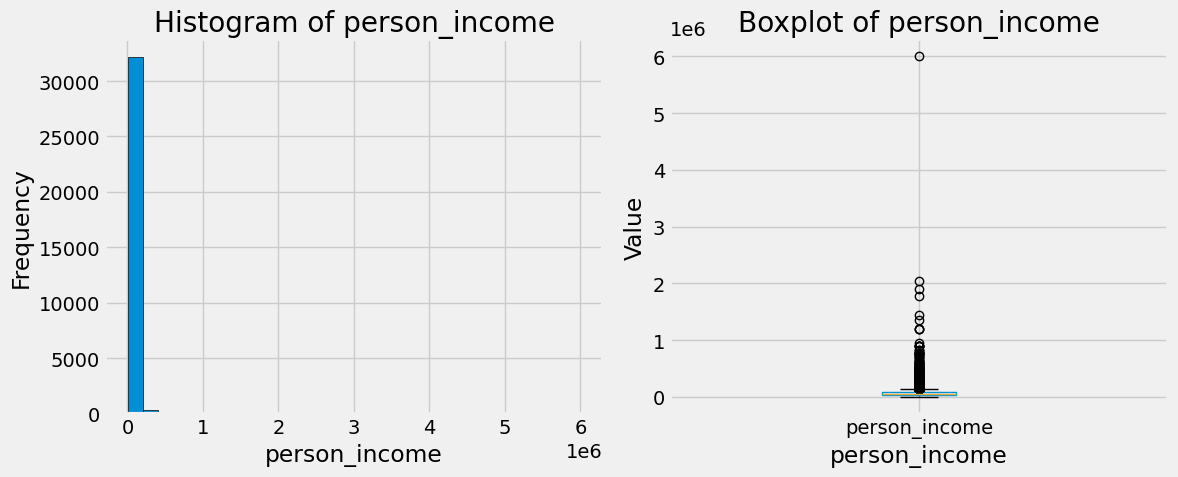

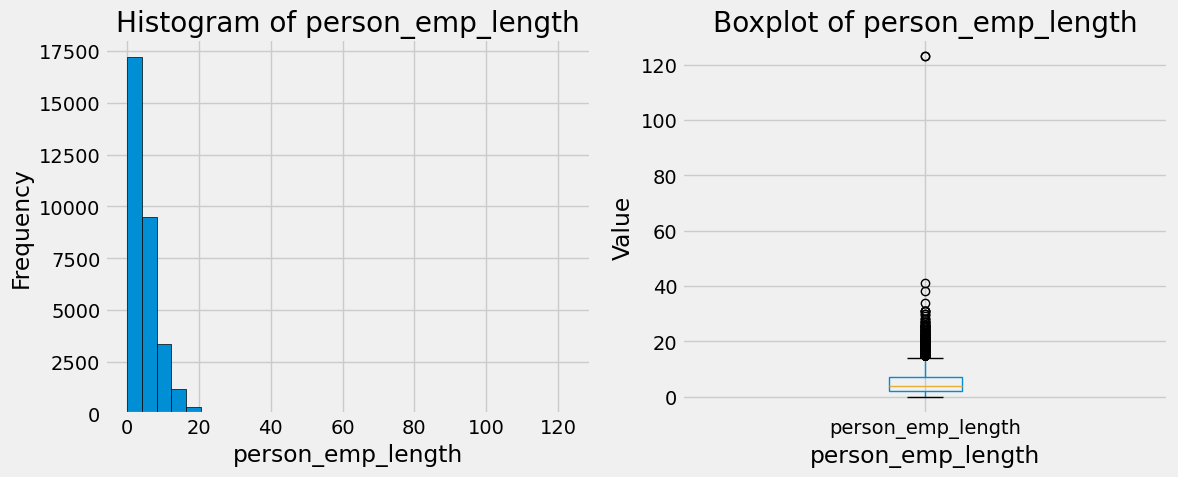

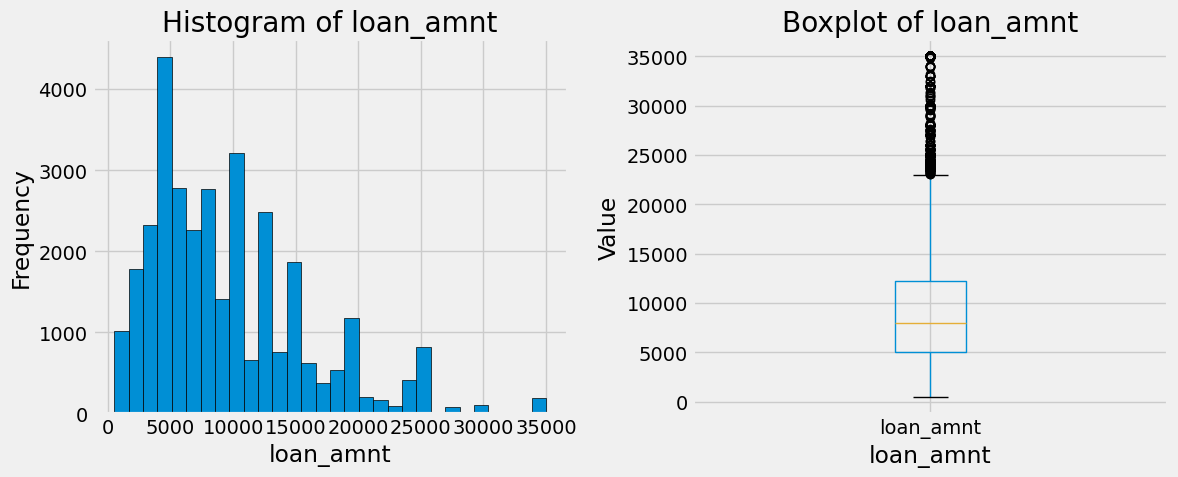

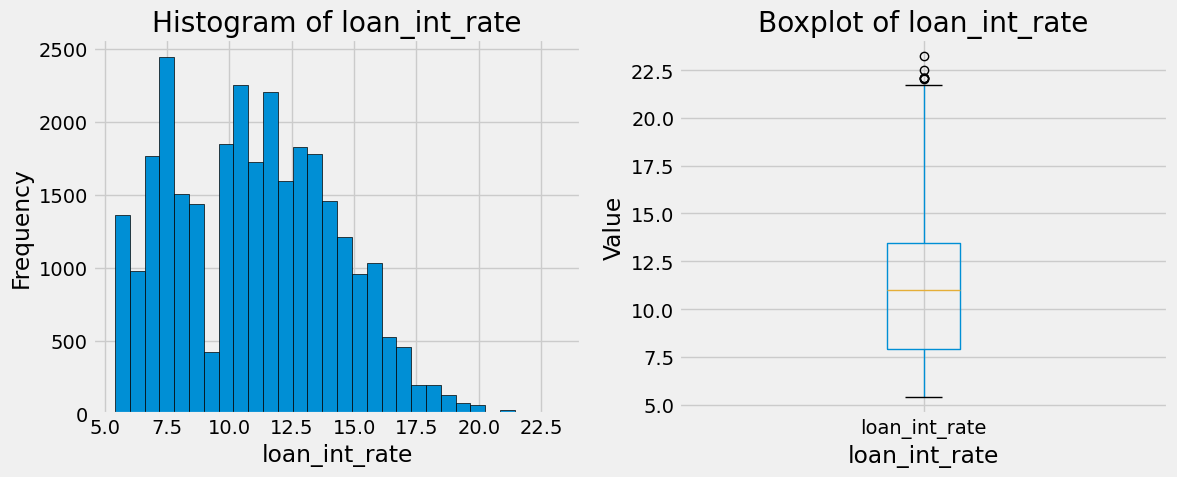

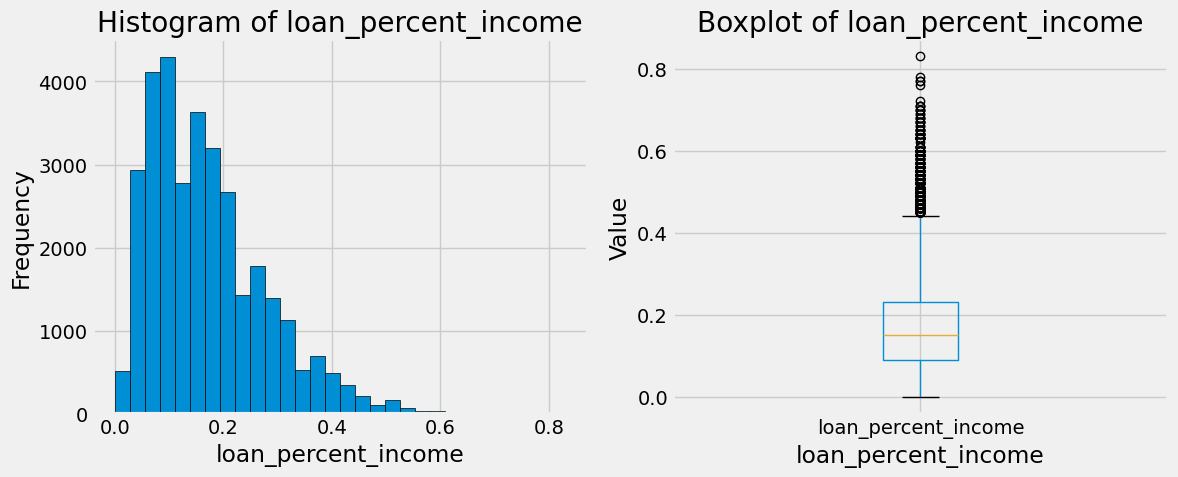

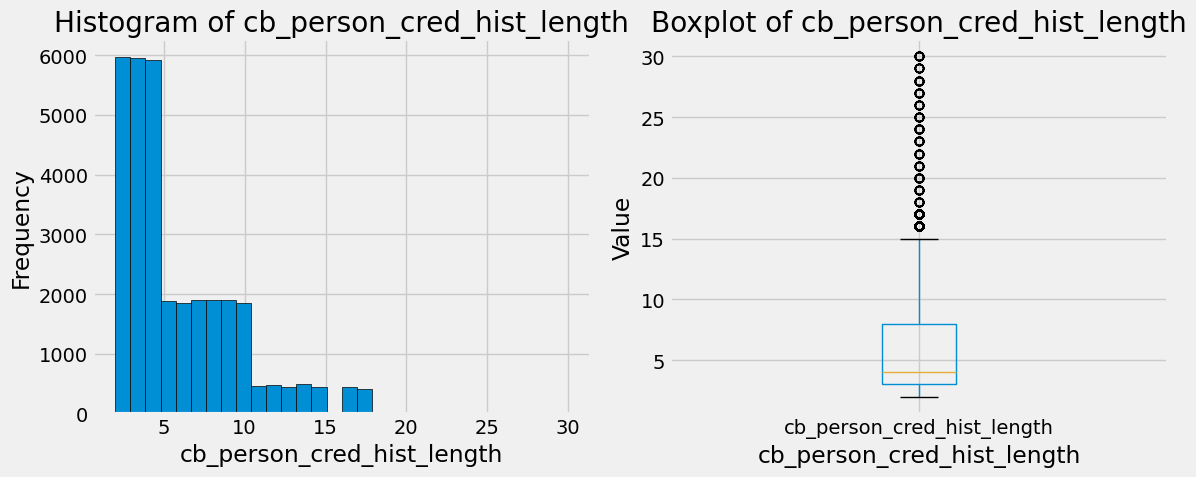

In [9]:
# Assuming df is your DataFrame
numerical_cols = df.select_dtypes("number").columns

plt.style.use('fivethirtyeight')
for numerical_col in numerical_cols:
    if numerical_col != "loan_status":
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns

        # Histogram
        df[numerical_col].hist(ax=axes[0], bins=30, edgecolor='black')
        axes[0].set_title(f"Histogram of {numerical_col}")
        axes[0].set_xlabel(numerical_col)
        axes[0].set_ylabel("Frequency")

        # Boxplot
        df.boxplot(column=numerical_col, ax=axes[1])
        axes[1].set_title(f"Boxplot of {numerical_col}")
        axes[1].set_xlabel(numerical_col)
        axes[1].set_ylabel("Value")

        # Show plots
        plt.tight_layout()
        plt.show()

Suspected outliers inside of the `person_age` where the longest people who ever lived was 122 years old.

In [10]:
df[df["person_age"] > 120]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


Looking at the data the numbers seems authentic. But in real life we might need to confirm about this.

### Categorical

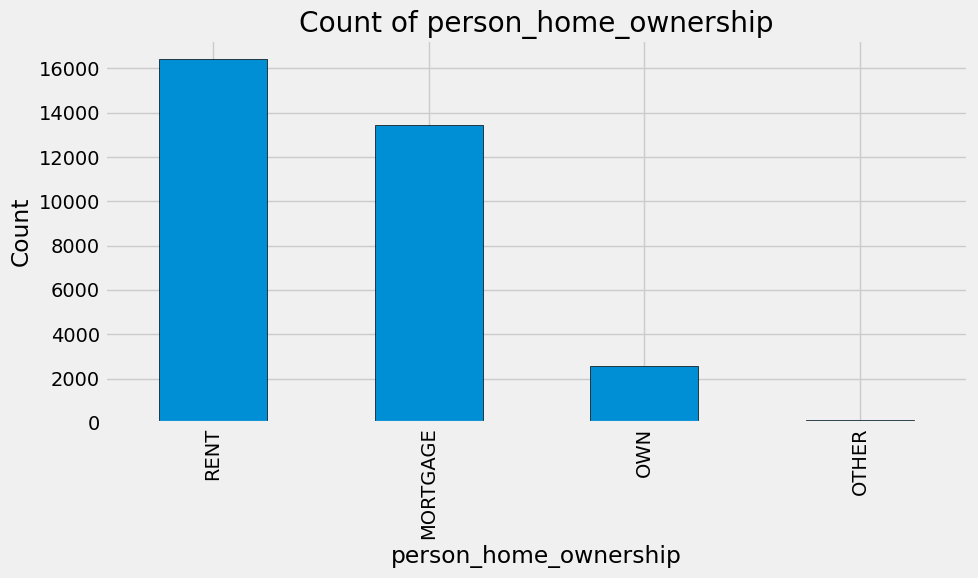

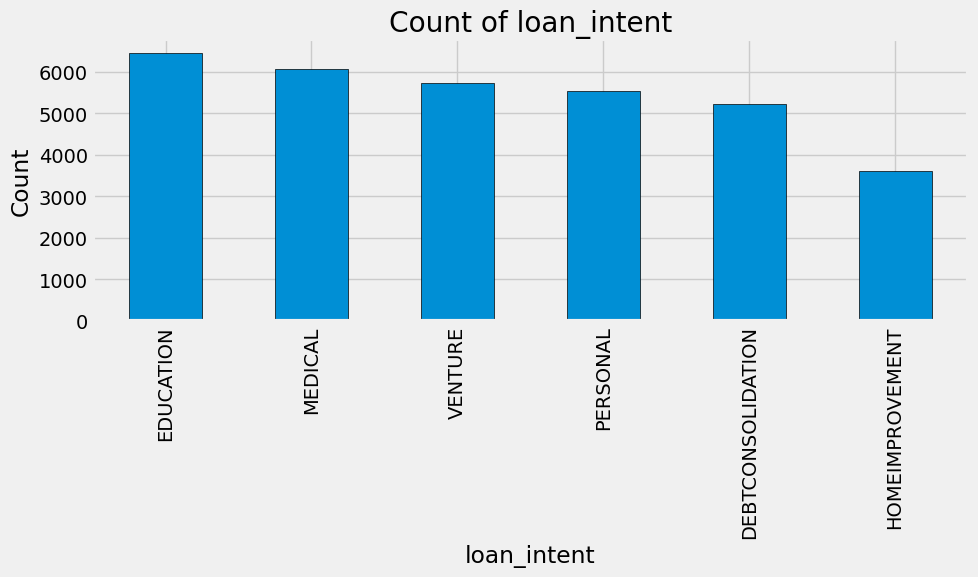

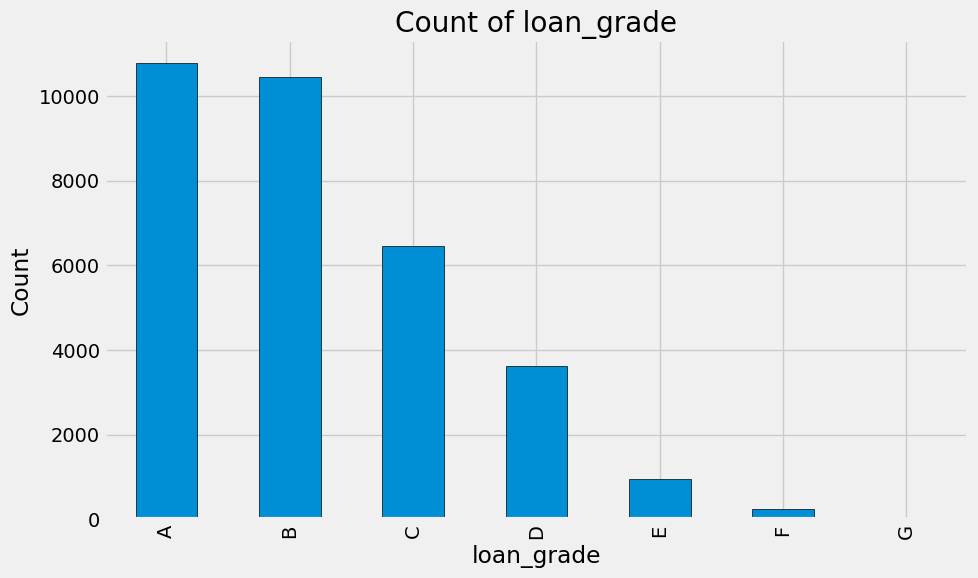

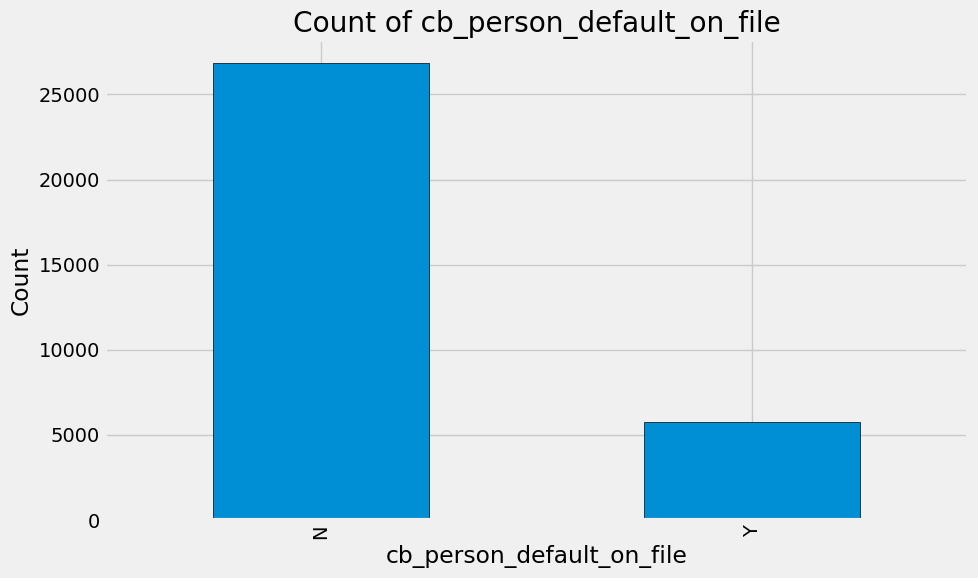

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
categorical_cols = df.select_dtypes("object").columns

plt.style.use('fivethirtyeight')
for categorical_col in categorical_cols:
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure

    # Bar plot
    df[categorical_col].value_counts().plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_col}")
    ax.set_xlabel(categorical_col)
    ax.set_ylabel("Count")

    # Show plot
    plt.tight_layout()
    plt.show()


## Multivariate Analysis

### Numerical vs Target

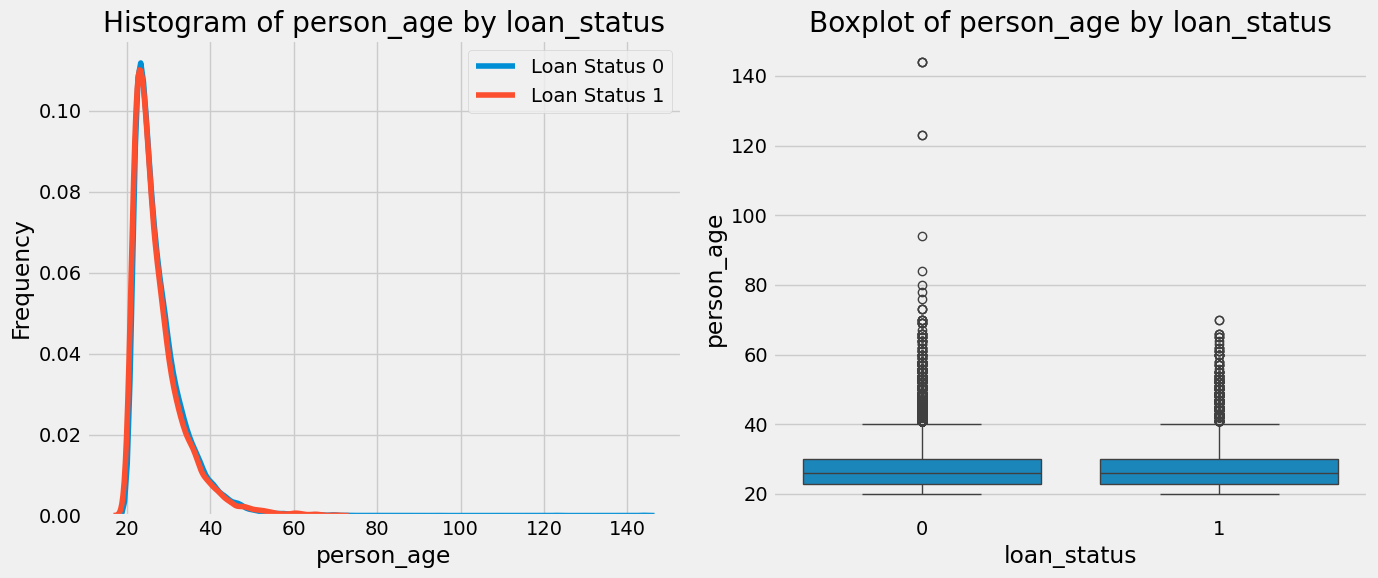

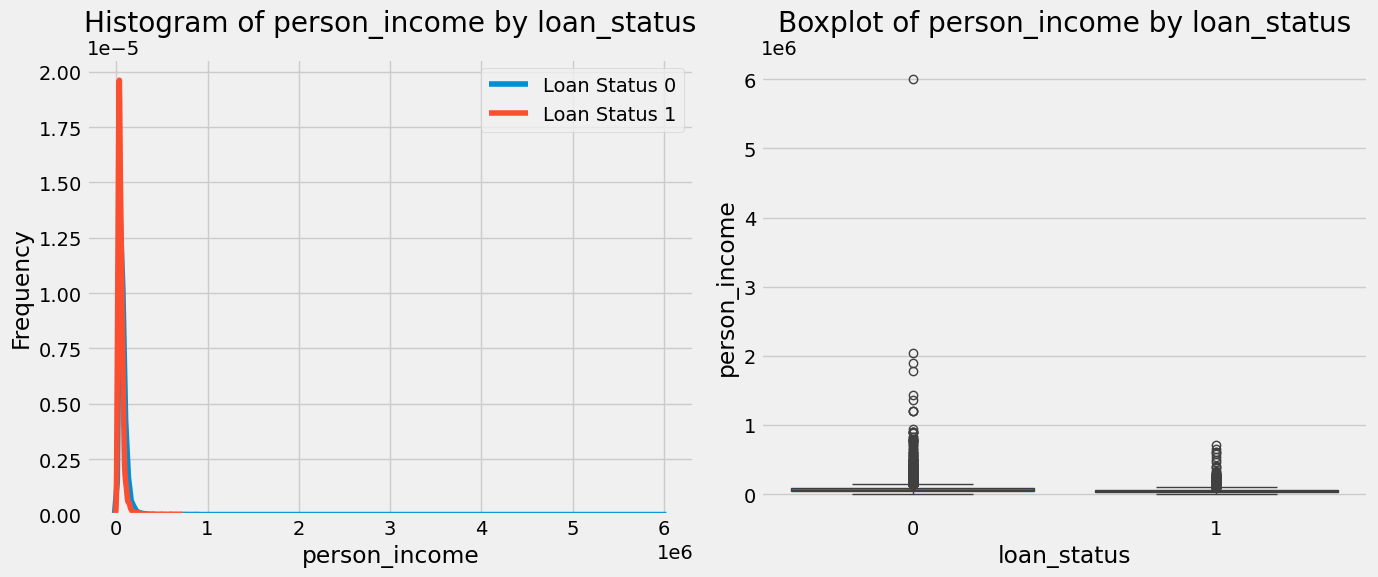

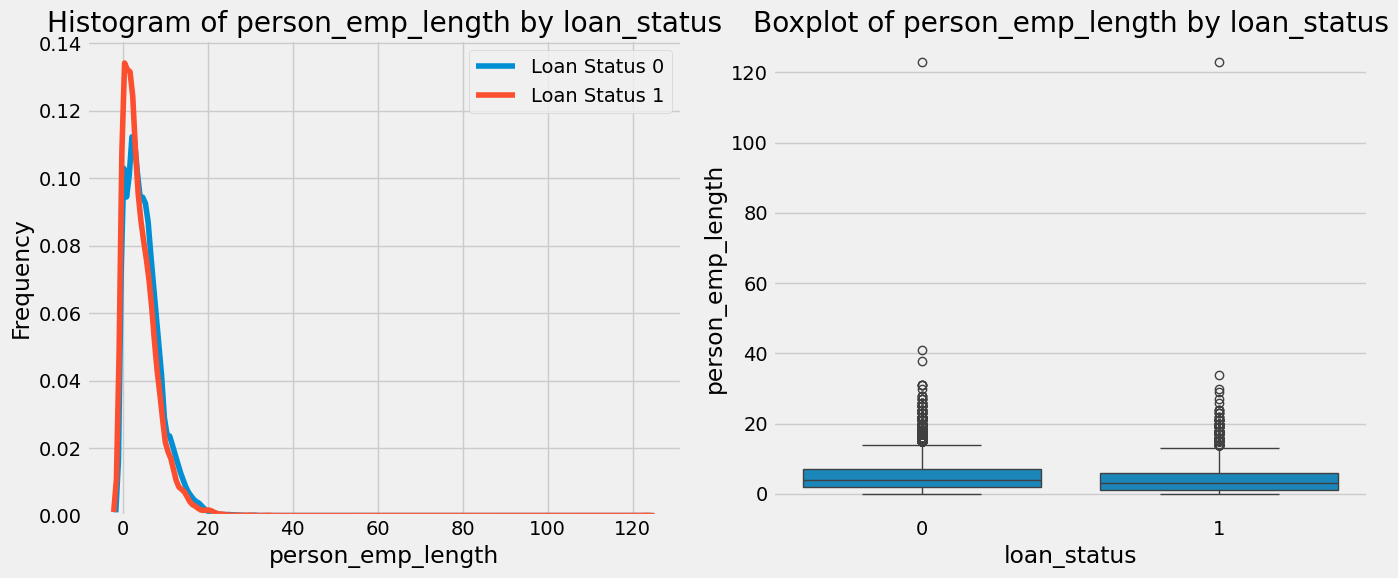

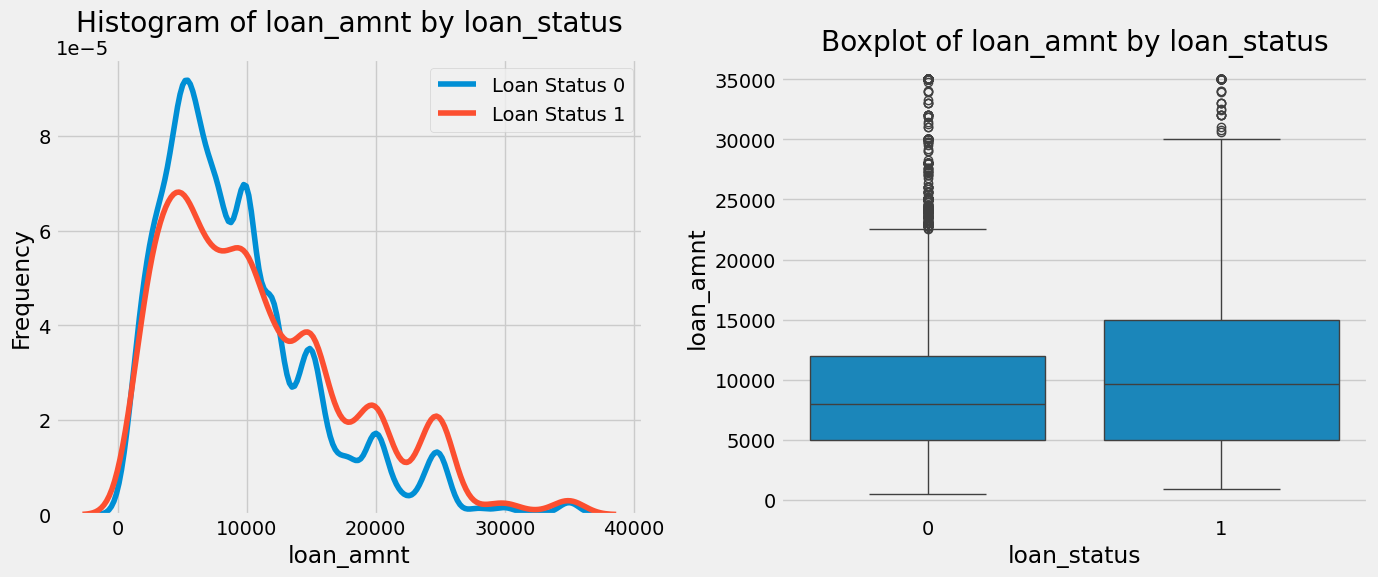

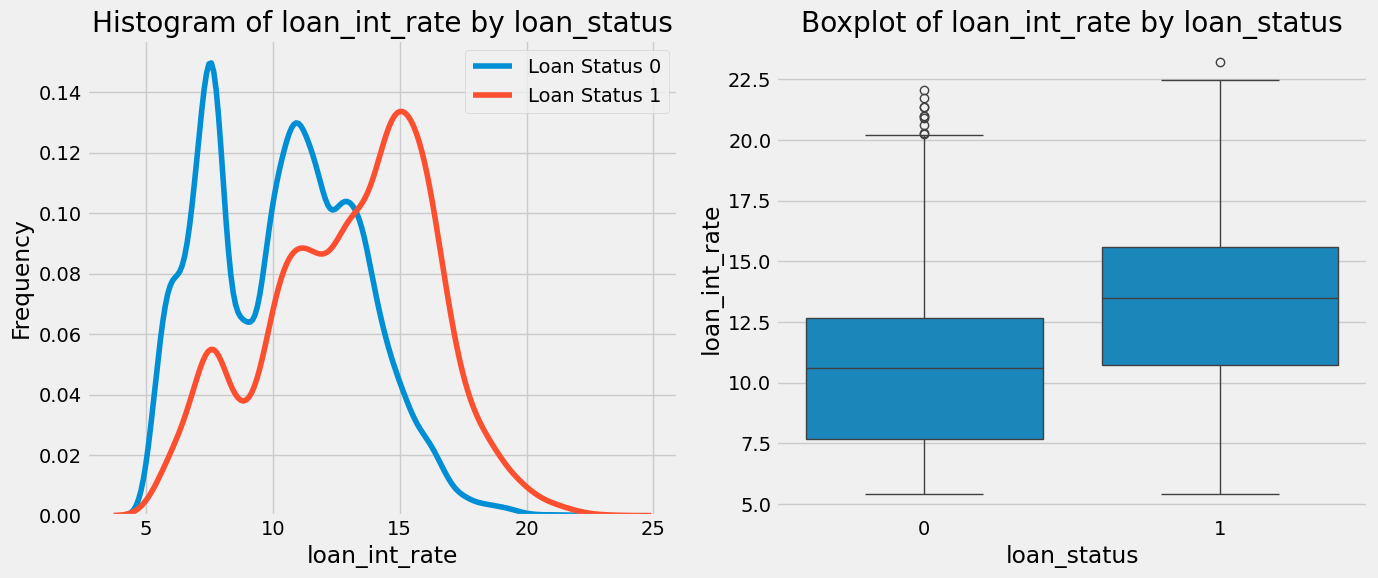

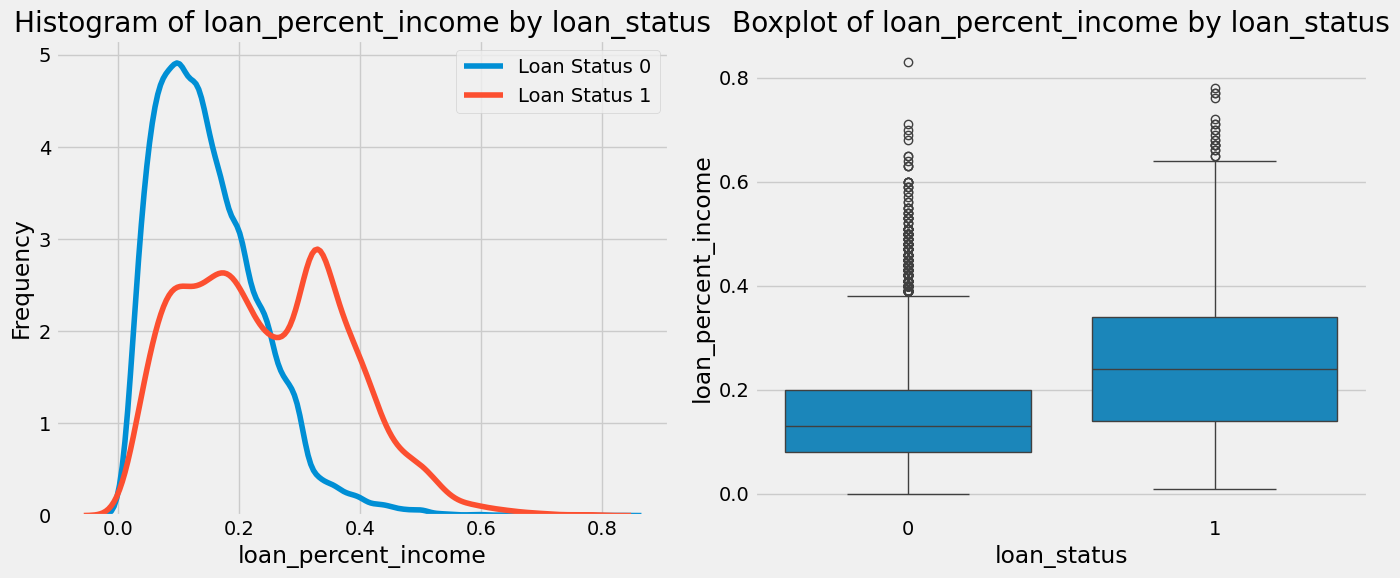

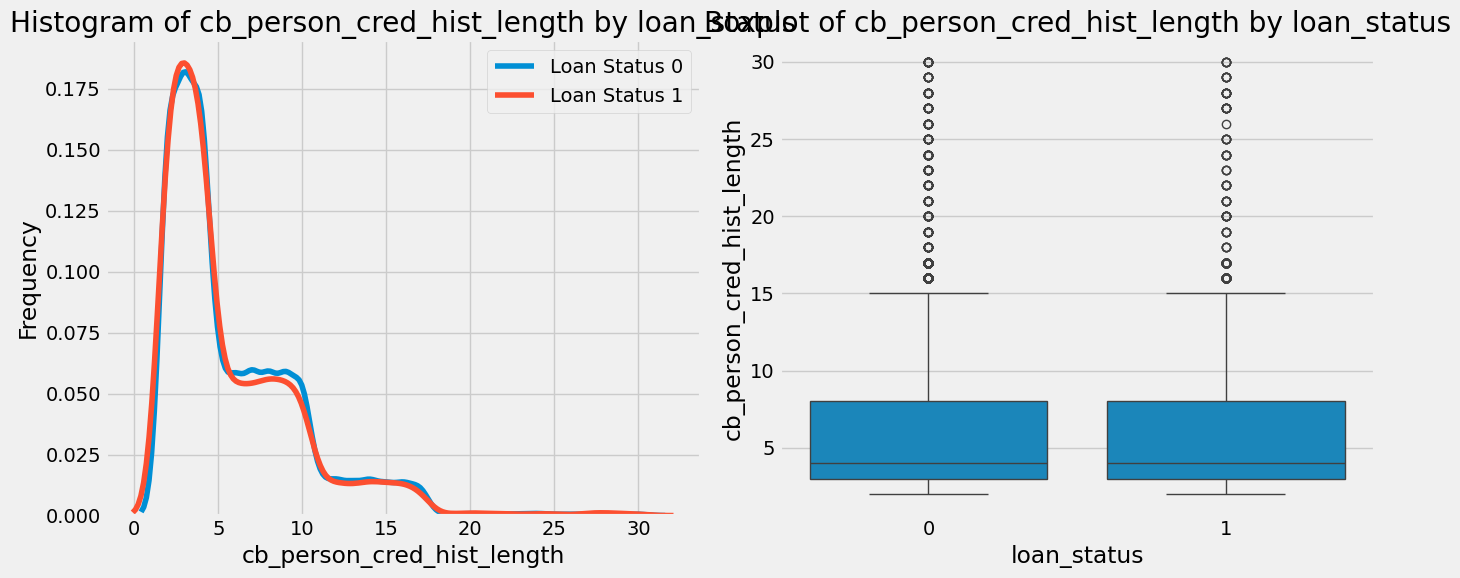

In [19]:
# Assuming df is your DataFrame and "loan_status" is the target variable
numerical_cols = df.select_dtypes("number").columns

plt.style.use('fivethirtyeight')
for numerical_col in numerical_cols:
    if numerical_col != "loan_status":
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with 1 row and 2 columns

        # Histogram with hue
        sns.kdeplot(data=df[df["loan_status"]==0], x=numerical_col, multiple='stack', ax=axes[0], label="Loan Status 0", fill=False)
        sns.kdeplot(data=df[df["loan_status"]==1], x=numerical_col, multiple='stack', ax=axes[0], label="Loan Status 1", fill=False)
        axes[0].set_title(f"Histogram of {numerical_col} by loan_status")
        axes[0].set_xlabel(numerical_col)
        axes[0].set_ylabel("Frequency")
        axes[0].legend()

        # Boxplot with hue
        sns.boxplot(data=df, x='loan_status', y=numerical_col, ax=axes[1])
        axes[1].set_title(f"Boxplot of {numerical_col} by loan_status")
        axes[1].set_xlabel('loan_status')
        axes[1].set_ylabel(numerical_col)

        # Show plots
        plt.tight_layout()
        plt.show()


2 features that shows higher chance loan status disapproval: `loan percent income` is high and `loan interest rate` are both high

### Categorical vs Target

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


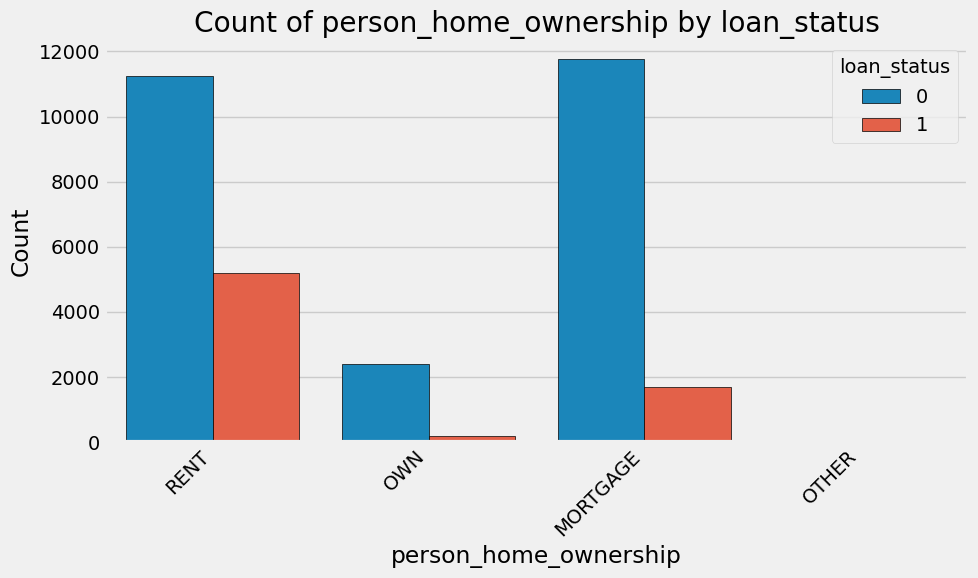

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


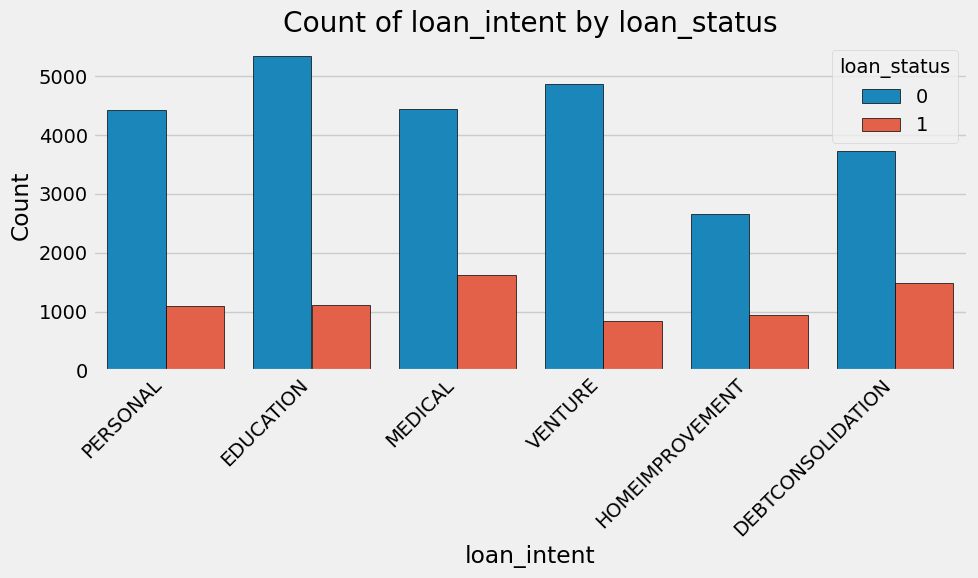

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


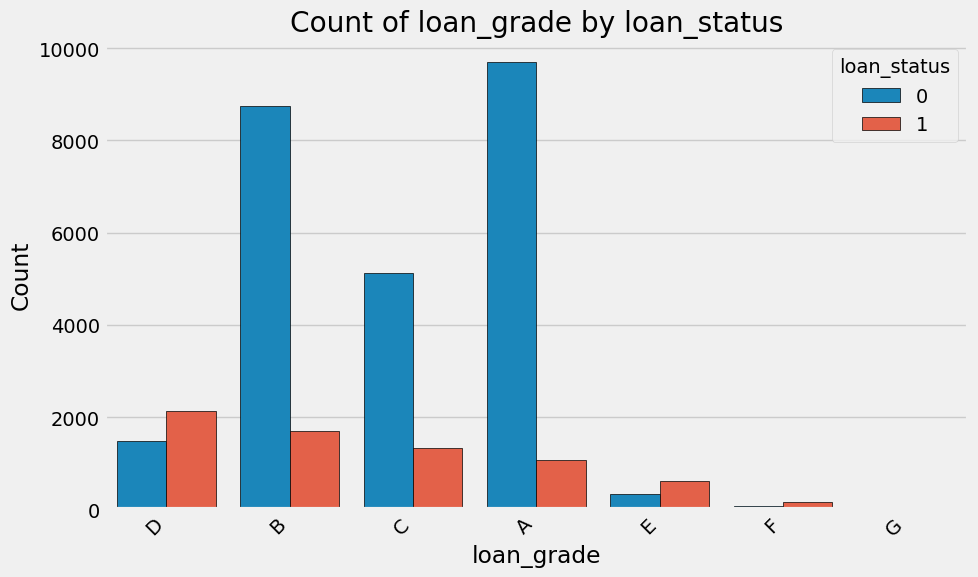

C:\Users\923006079\AppData\Local\Temp\ipykernel_1676\4194045871.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


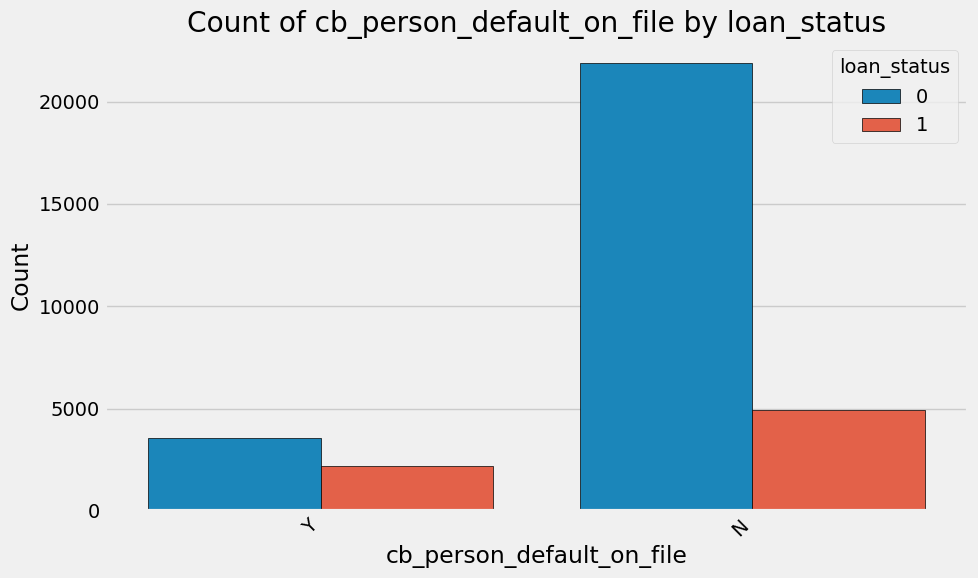

In [21]:
# Assuming df is your DataFrame and "loan_status" is the target variable
plt.style.use('fivethirtyeight')

categorical_cols = df.select_dtypes("object").columns
for categorical_col in categorical_cols:
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure

    # Bar plot with hue
    sns.countplot(data=df, x=categorical_col, hue='loan_status', ax=ax, edgecolor='black')
    ax.set_title(f"Count of {categorical_col} by loan_status")
    ax.set_xlabel(categorical_col)
    ax.set_ylabel("Count")

    # Rotate x labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()


In [83]:
# Count of 1 and 0 for cb_person_default_on_file grouped by loan_status
count_result = df.groupby("cb_person_default_on_file")['loan_status'].value_counts(normalize=True).unstack(fill_value=0)

# Display the result
count_result

loan_status,0,1
cb_person_default_on_file,,
N,0.816068,0.183932
Y,0.621932,0.378068


In [84]:
# Count of 1 and 0 for cb_person_default_on_file grouped by loan_status
count_result = df.groupby('person_home_ownership')['loan_status'].value_counts().unstack(fill_value=0) / len(df)

# Display the result
count_result

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.360762,0.051871
OTHER,0.002271,0.001013
OWN,0.073386,0.005924
RENT,0.345416,0.159357


In [85]:
# Count of 1 and 0 for cb_person_default_on_file grouped by loan_status
count_result = df.groupby('loan_grade')['loan_status'].value_counts().unstack(fill_value=0) / len(df)

# Display the result
count_result

loan_status,0,1
loan_grade,,
A,0.297842,0.032933
B,0.268561,0.052208
C,0.157116,0.041098
D,0.045579,0.065713
E,0.010528,0.019060
F,0.002179,0.005218
G,0.000031,0.001934


1. Those who has history of default in the past has 37% probability of default.
2. Those who still **rent** has 16% probability of default.

## Multicollinearity

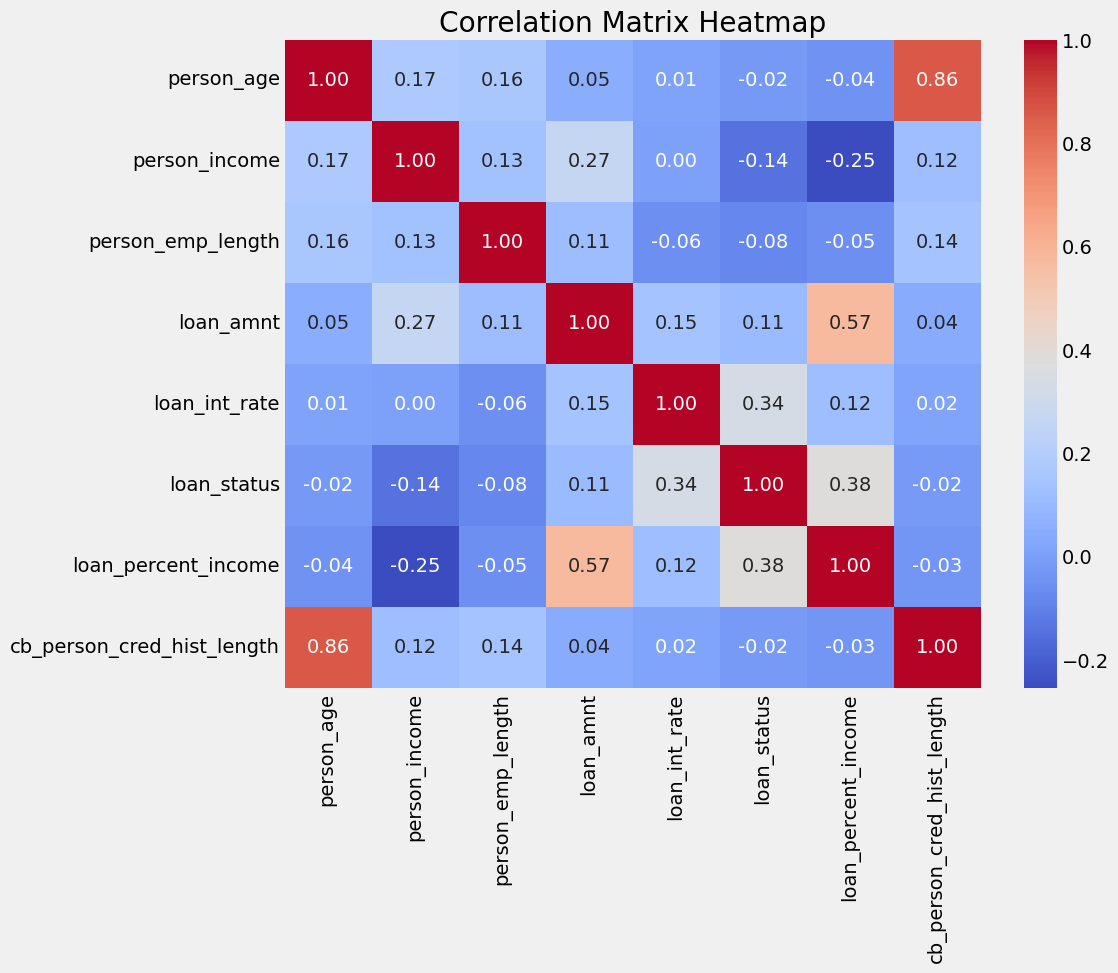

In [89]:
corr = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

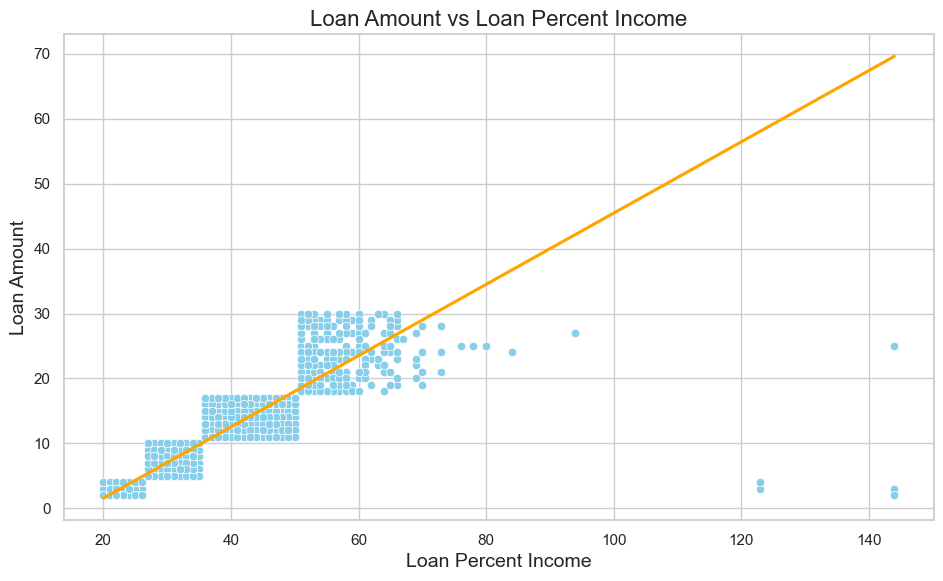

In [114]:
# Set style
sns.set(style="whitegrid")

# Create scatterplot with customized aesthetics
plt.figure(figsize=(10, 6))
sns.scatterplot(x="person_age", y="cb_person_cred_hist_length", data=df, color='skyblue')

# Add trend line
sns.regplot(x="person_age", y="cb_person_cred_hist_length", data=df, scatter=False, color='orange', ci=None)

# Add labels and title
plt.xlabel("Loan Percent Income", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.title("Loan Amount vs Loan Percent Income", fontsize=16)

# Add annotations or additional information if needed

# Show plot
plt.show()

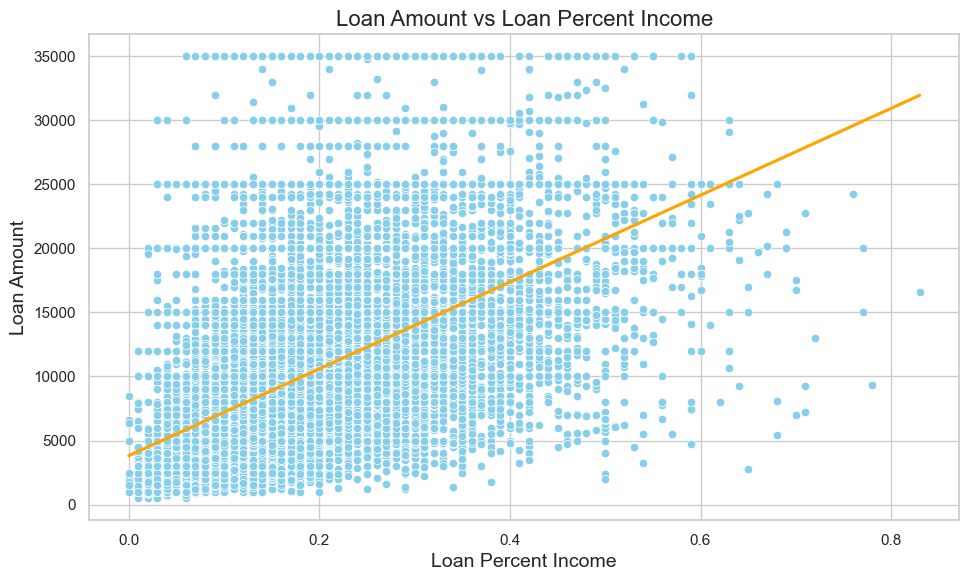

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create scatterplot with customized aesthetics
plt.figure(figsize=(10, 6))
sns.scatterplot(x="loan_percent_income", y="loan_amnt", data=df, color='skyblue')

# Add trend line
sns.regplot(x="loan_percent_income", y="loan_amnt", data=df, scatter=False, color='orange', ci=None)

# Add labels and title
plt.xlabel("Loan Percent Income", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.title("Loan Amount vs Loan Percent Income", fontsize=16)

# Add annotations or additional information if needed

# Show plot
plt.show()


# WOE and IV

In [116]:
# split data betweem train and text
X, y = df.drop(columns=["loan_status"]), df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

## 1. Perform Binning on Categorical Variables

In [11]:
def create_binning(data, predictor_label, num_of_bins):
    data[predictor_label + "_bin"] = pd.qcut(
        data[predictor_label],
        q = num_of_bins, duplicates="drop"
    )
    return data


numerical_cols =  [col for col in train.select_dtypes("number") if col != "loan_status"]
train_binned = train.copy()
for numerical_col in numerical_cols:
    train_binned = create_binning(
        data = train_binned,
        predictor_label = numerical_col,
        num_of_bins = 5
    )

display(train_binned.head().T)
display(train_binned.isna().sum())

,15884,15138,7474,18212,6493
person_age,25,21,25,28,25
person_income,241875,18000,53000,16800,50000
person_home_ownership,MORTGAGE,RENT,MORTGAGE,OWN,MORTGAGE
person_emp_length,4.0,5.0,10.0,NaN,2.0
loan_intent,EDUCATION,PERSONAL,MEDICAL,MEDICAL,VENTURE
loan_grade,A,B,B,C,A
loan_amnt,16000,1500,16000,5000,10000
loan_int_rate,7.05,12.18,12.53,13.98,7.9
loan_percent_income,0.07,0.08,0.3,0.3,0.2
cb_person_default_on_file,N,N,N,N,N


person_age                           0
person_income                        0
person_home_ownership                0
person_emp_length                  738
loan_intent                          0
loan_grade                           0
loan_amnt                            0
loan_int_rate                     2501
loan_percent_income                  0
cb_person_default_on_file            0
cb_person_cred_hist_length           0
loan_status                          0
person_age_bin                       0
person_income_bin                    0
person_emp_length_bin              738
loan_amnt_bin                        0
loan_int_rate_bin                 2501
loan_percent_income_bin              0
cb_person_cred_hist_length_bin       0
dtype: int64

In [12]:
# Define columns with missing values
missing_columns = ['person_emp_length_bin', 'loan_int_rate_bin']

# Perform grouping for all columns
for column in missing_columns:

    # Add category 'Missing' to replace the missing values
    train_binned[column] = train_binned[column].cat.add_categories('Missing')

    # Replace missing values with category 'Missing'
    train_binned[column] = train_binned[column].fillna(value = 'Missing')

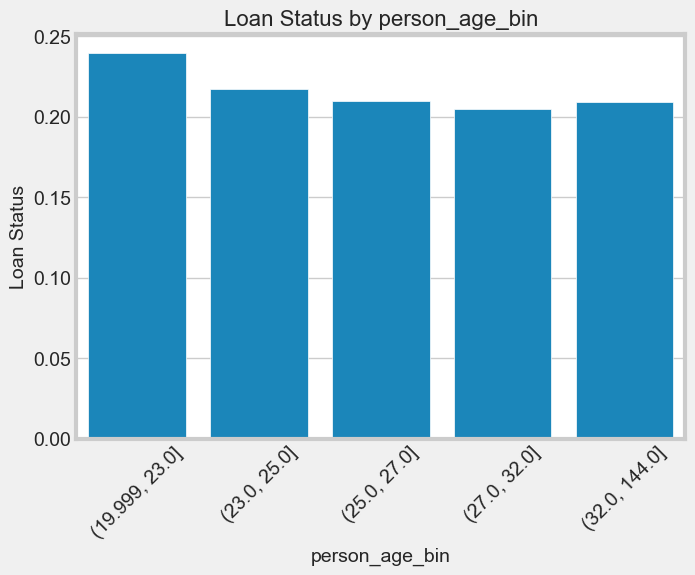

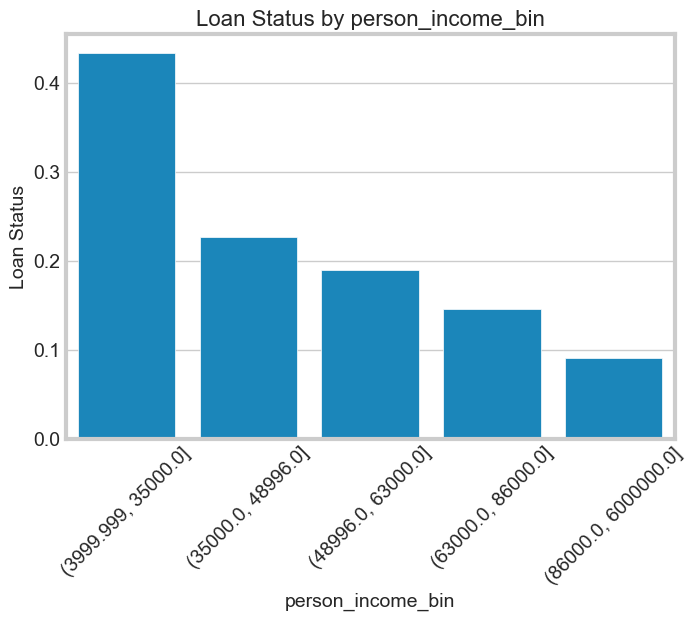

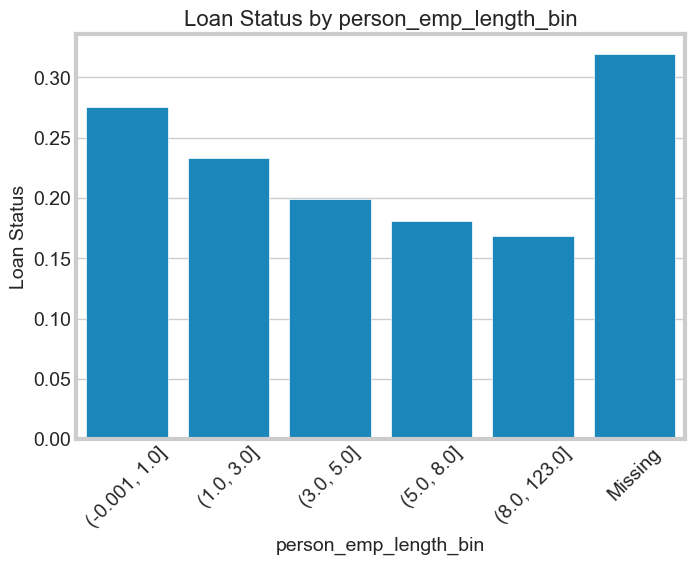

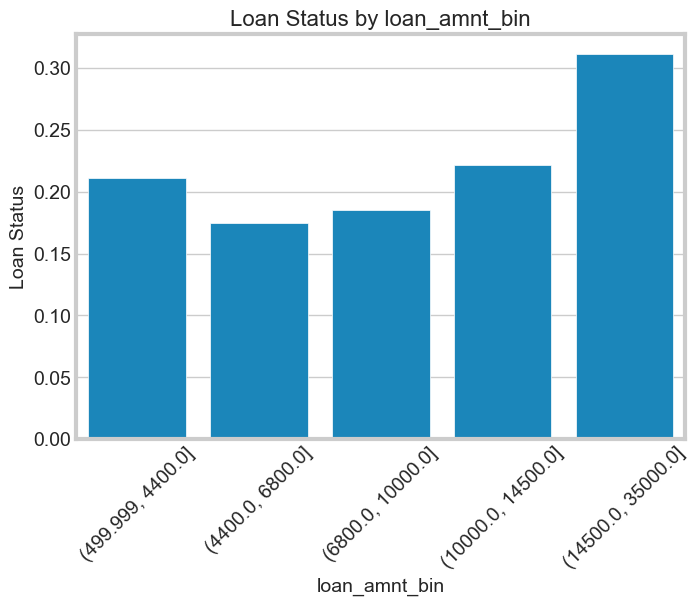

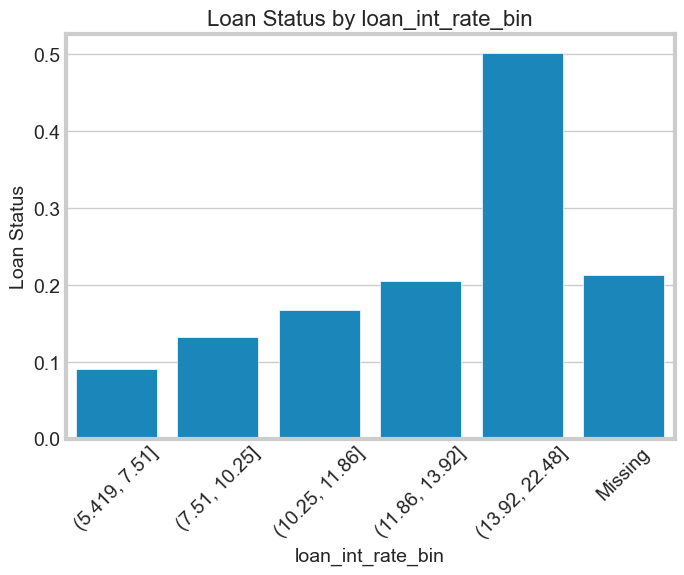

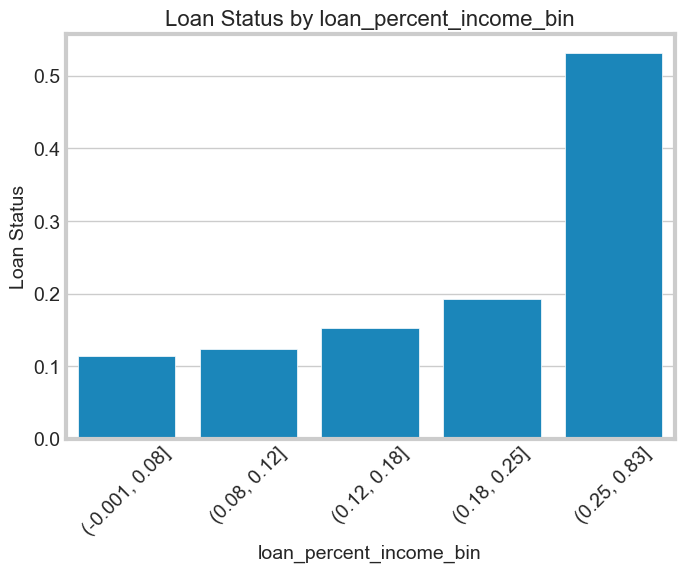

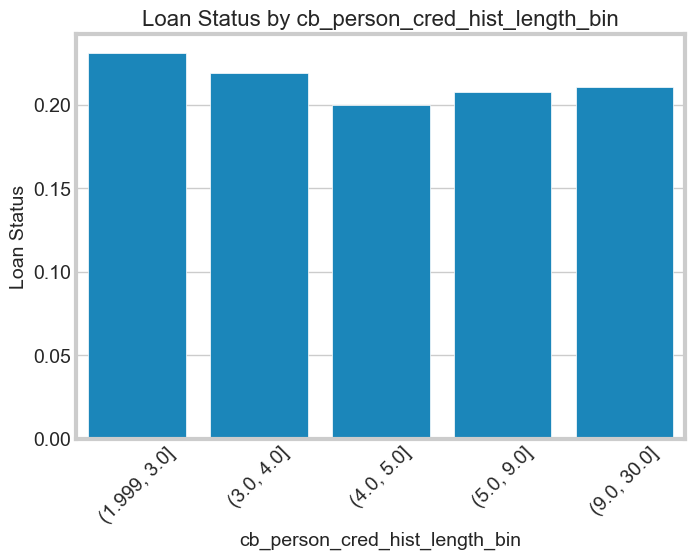

In [14]:
plt.style.use('fivethirtyeight')
for col in train_binned.columns:
    if "bin" in col:
        # Set figure size and style
        plt.figure(figsize=(7, 5))
        sns.set_style("whitegrid")

        # Create bar plot with customized aesthetics
        sns.barplot(x=col, y="loan_status", data=train_binned, errorbar=None)

        # Add title and labels
        plt.title(f"Loan Status by {col}", fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Loan Status", fontsize=14)
        plt.xticks(rotation=45)

        # Show plot
        plt.show()


## 2. Calculate WoE and IV

In [15]:
drop_cols = [
    "person_age", "person_income", "person_emp_length", "loan_amnt",
    "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"
]
train_binned = train_binned.drop(columns=drop_cols)

In [16]:
# 1. Calculate the total amount of values inside each bin. Calculate the default and non default cases
crosstabs = {}
for col in train_binned.columns:
    if col != "loan_status":
        crosstabs[col] = pd.crosstab(train_binned[col], train_binned["loan_status"], margins=True)

In [17]:
# 2. Calculate the Weight of Evidence and Information Value
WOE_df = pd.DataFrame()
IV_df = pd.DataFrame()

for col, crosstab in crosstabs.items(): 
    crosstab["proportion_not_default"] = crosstab[0] / crosstab[0]["All"]
    crosstab["proportion_default"] = crosstab[1] / crosstab[1]["All"]
    crosstab["WoE"] = np.log(crosstab["proportion_not_default"]/ crosstab["proportion_default"])
    IV = np.sum((crosstab["proportion_not_default"]-crosstab["proportion_default"])*crosstab["WoE"])

    crosstab = crosstab.reset_index()
    temp_WOE_df = crosstab.iloc[:-1, [0, -1]].copy()
    temp_WOE_df.columns = ["Feature Value", "WoE"]
    temp_WOE_df.loc[:, "Feature Name"] = col
    WOE_df = pd.concat((WOE_df, temp_WOE_df), axis=0)
    IV_df = pd.concat((IV_df, pd.DataFrame({"Feature Name": [col], "IV": [IV]})))

WOE_df = WOE_df[["Feature Name", "Feature Value", "WoE"]]
WOE_df = WOE_df.reset_index(drop=True)
IV_df = IV_df.reset_index(drop=True)

gc.enable()
crosstab = None
crosstabs = None
gc.collect()

12233

In [18]:
def interpret_iv(value):
    if value < 0.02:
        return "Not Predictive"
    elif 0.02 <= value and value < 0.1:
        return "Weak Predictive"
    elif 0.1 <= value and value < 0.3:
        return "Medium Predictive"
    elif 0.3 <= value and value < 0.5:
        return "Strong Predictive"
    else:
        return "Very Strong Predictive"

IV_df["Interpretation"] = IV_df["IV"].apply(lambda x: interpret_iv(x))
IV_df.sort_values(by="IV")

,Feature Name,IV,Interpretation
10,cb_person_cred_hist_length_bin,0.003927,Not Predictive
4,person_age_bin,0.006276,Not Predictive
6,person_emp_length_bin,0.059921,Weak Predictive
7,loan_amnt_bin,0.077772,Weak Predictive
1,loan_intent,0.088686,Weak Predictive
3,cb_person_default_on_file,0.162480,Medium Predictive
0,person_home_ownership,0.389711,Strong Predictive
5,person_income_bin,0.459059,Strong Predictive
8,loan_int_rate_bin,0.600325,Very Strong Predictive
9,loan_percent_income_bin,0.709054,Very Strong Predictive


## 3. Plot WoE

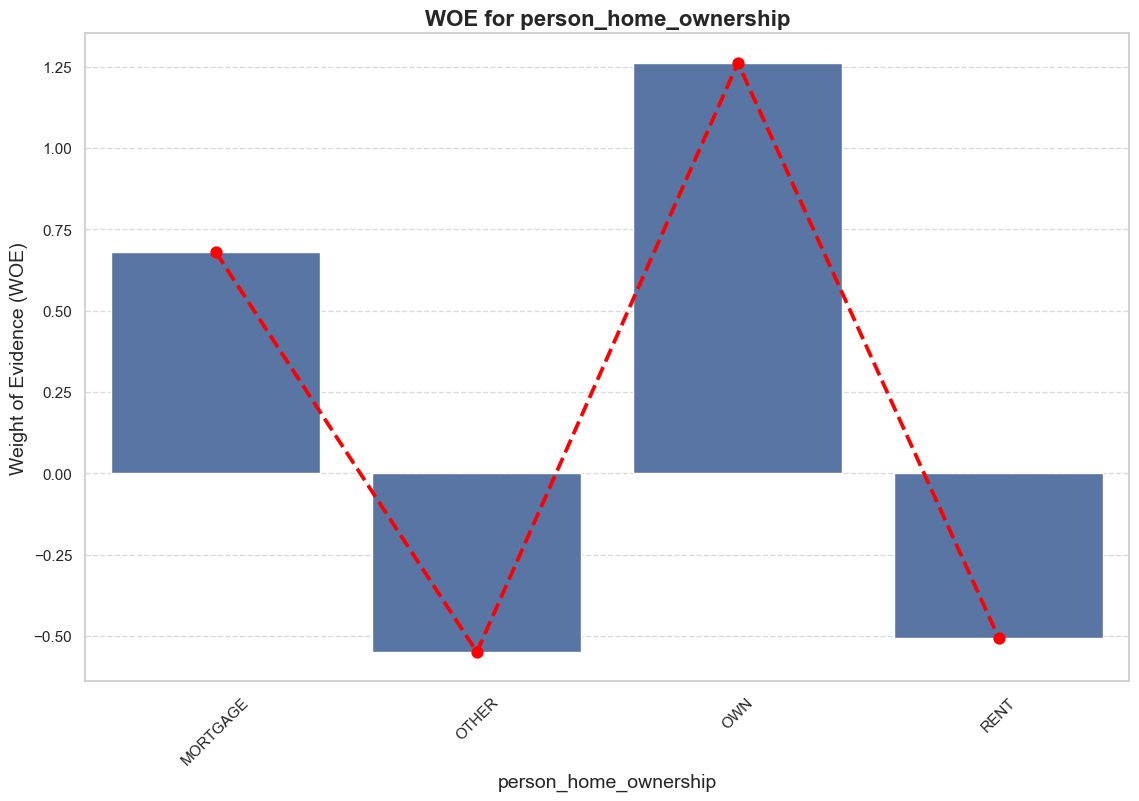

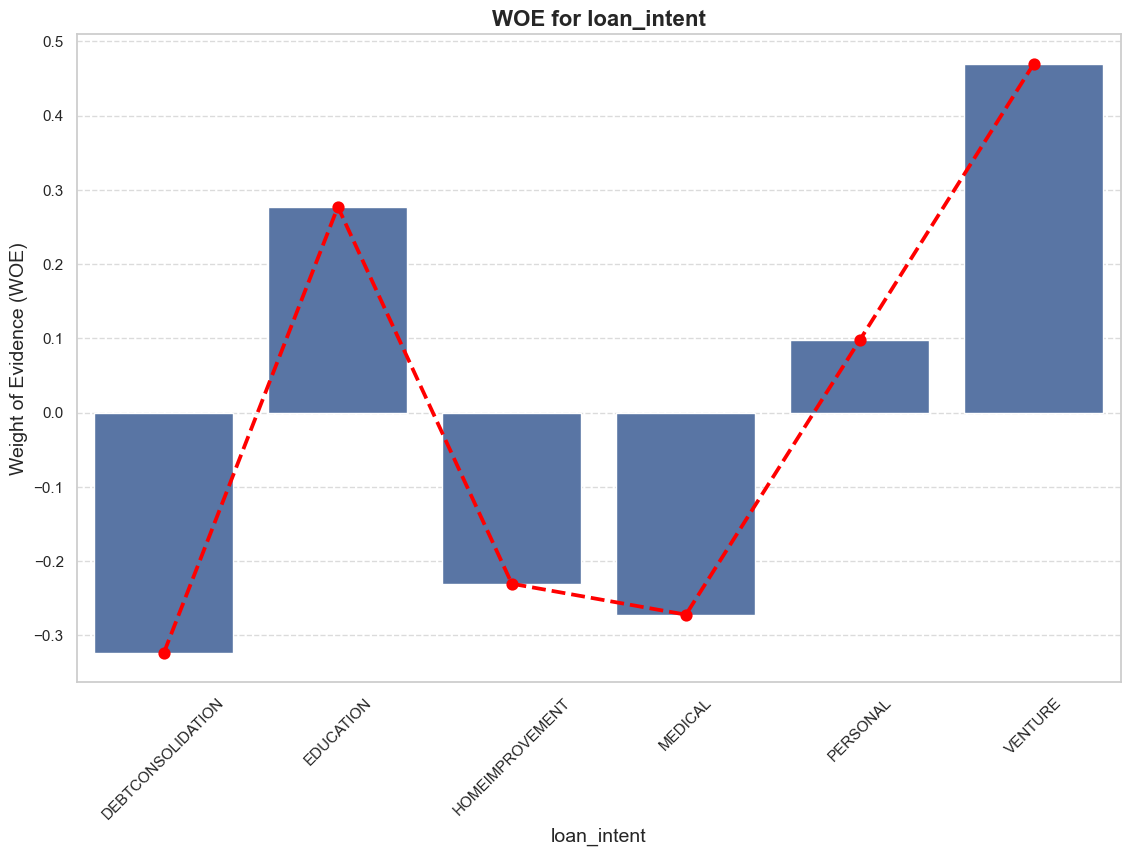

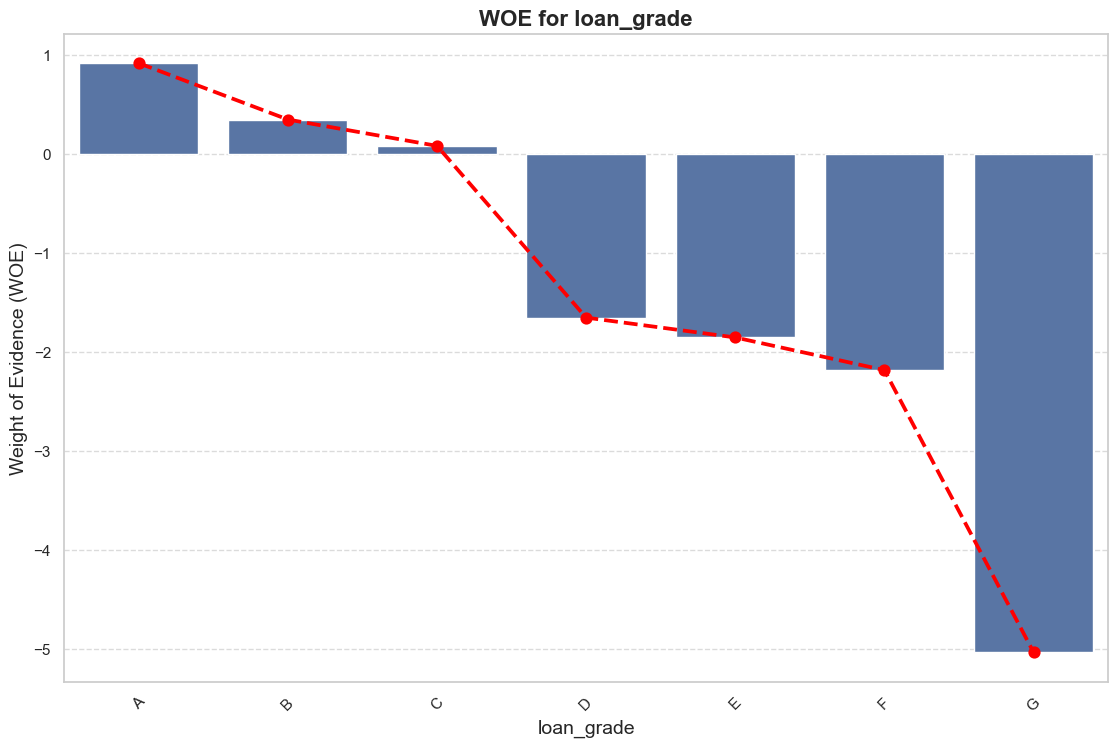

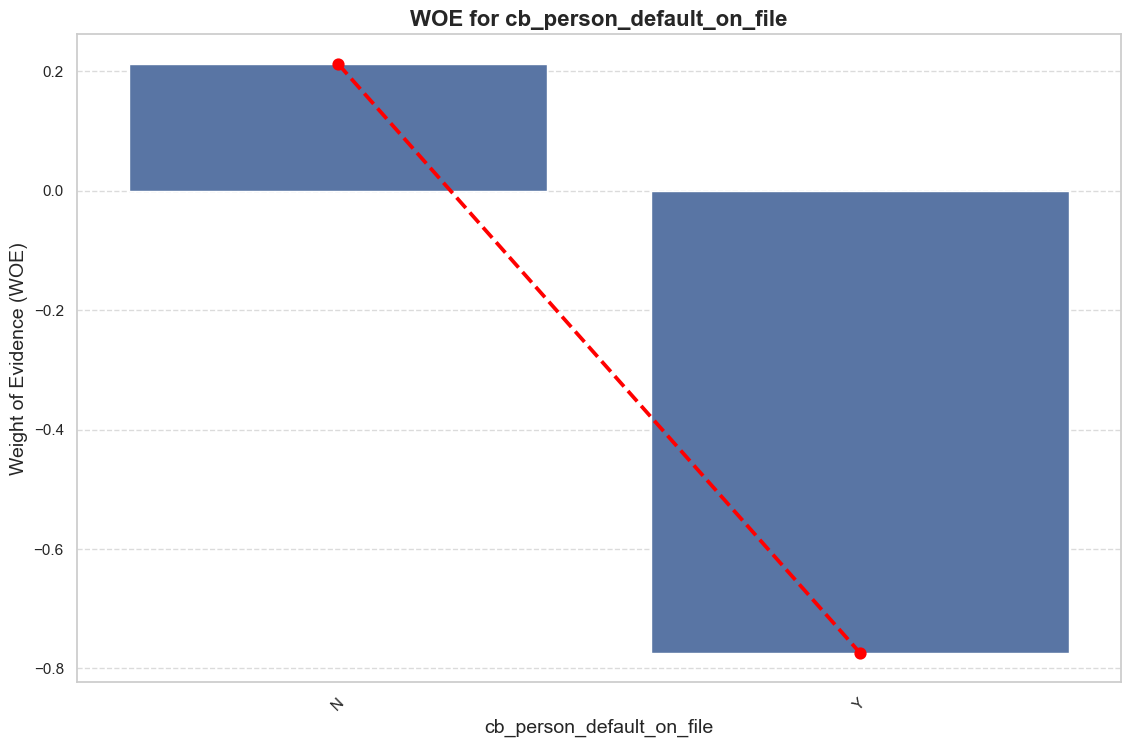

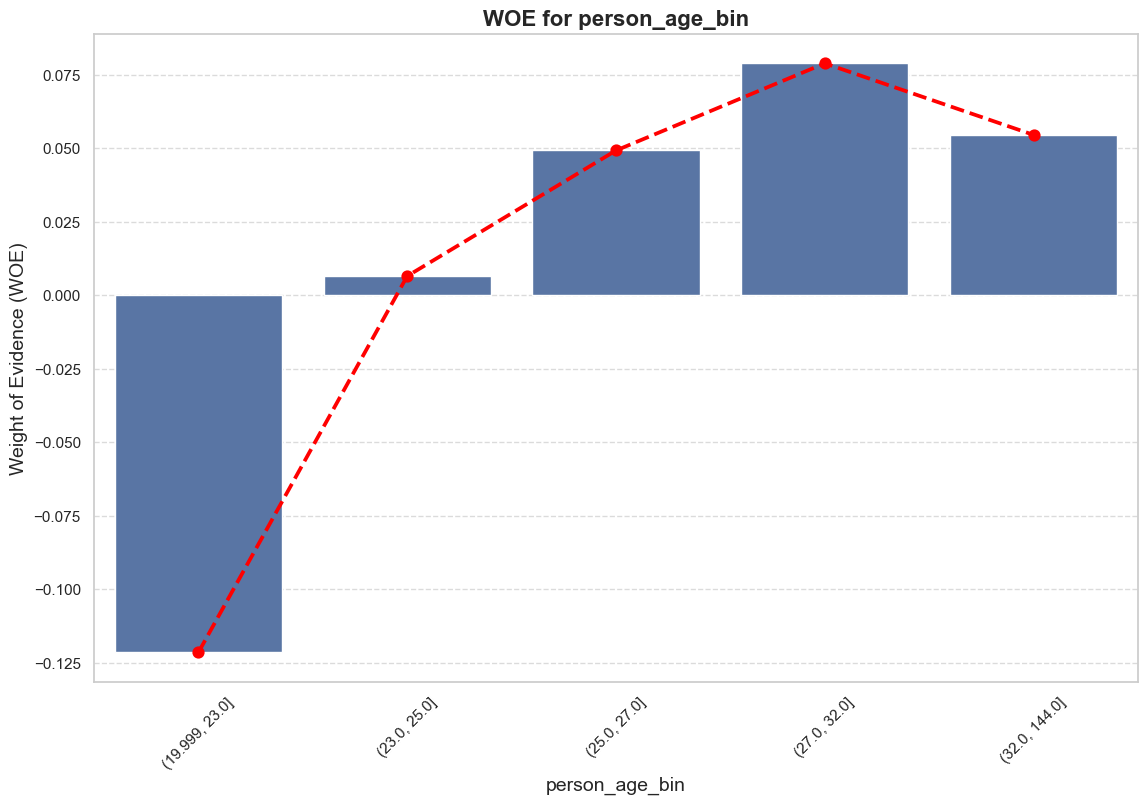

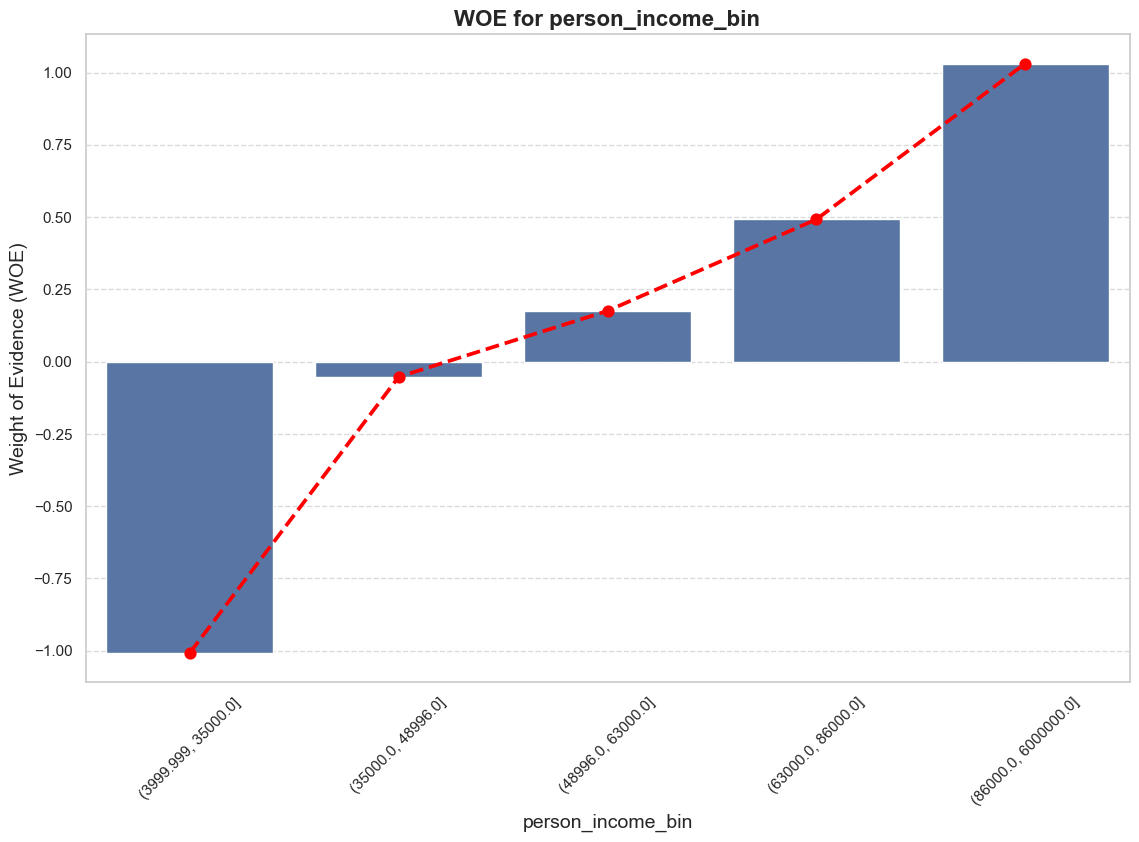

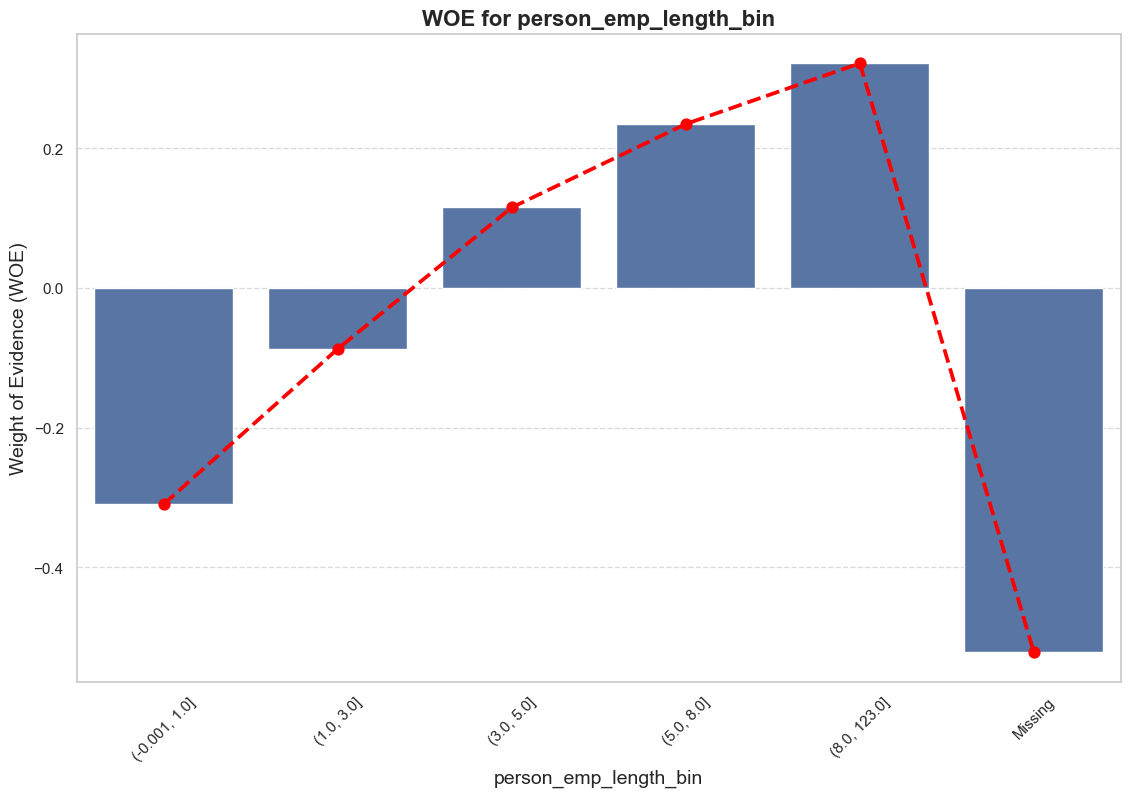

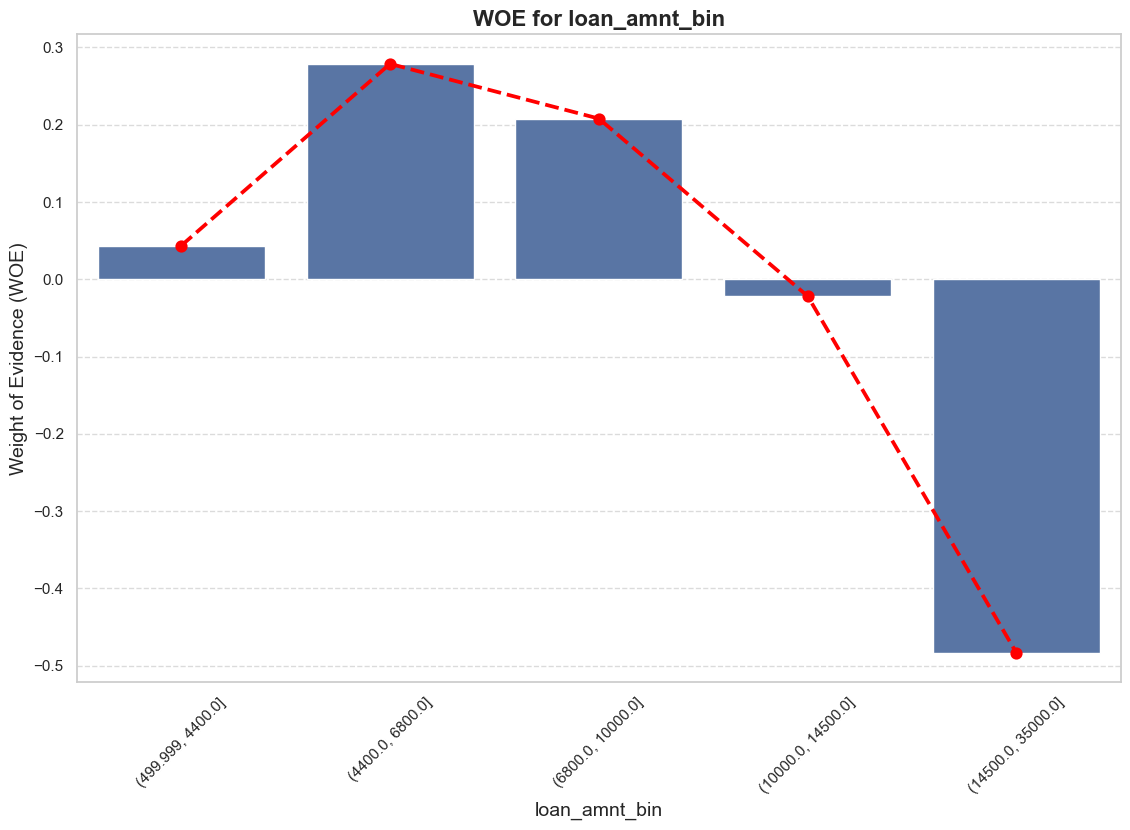

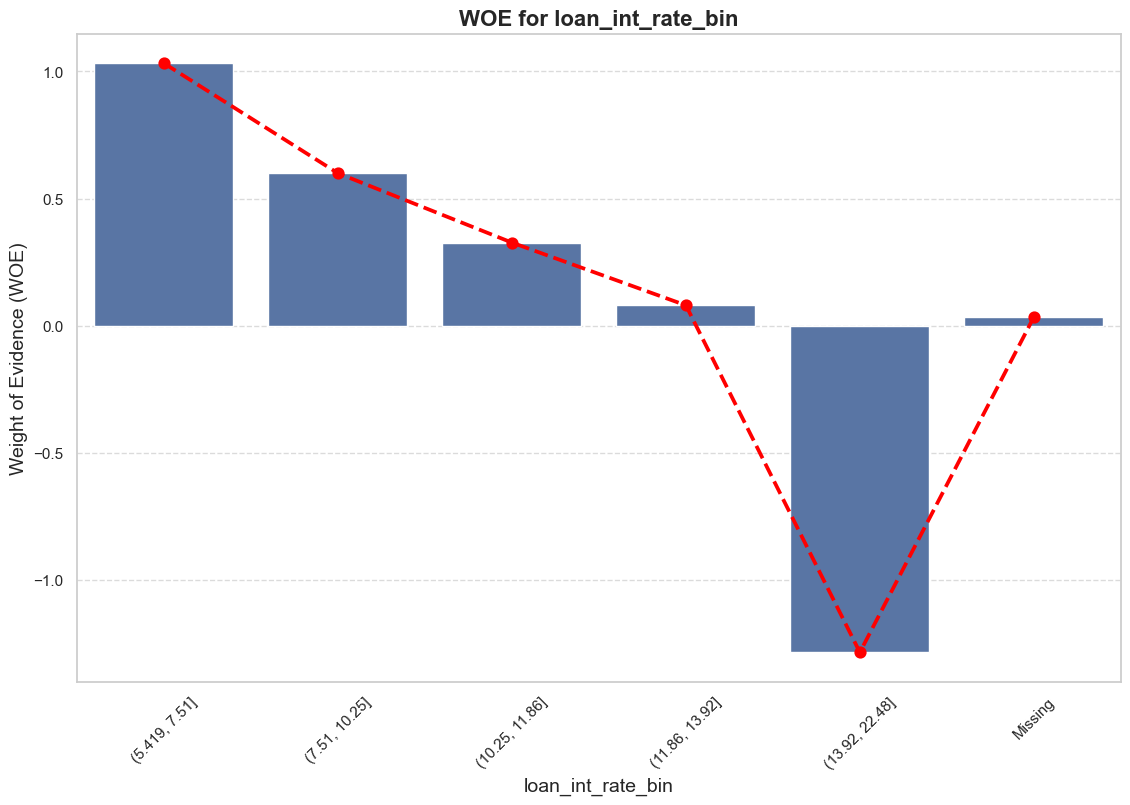

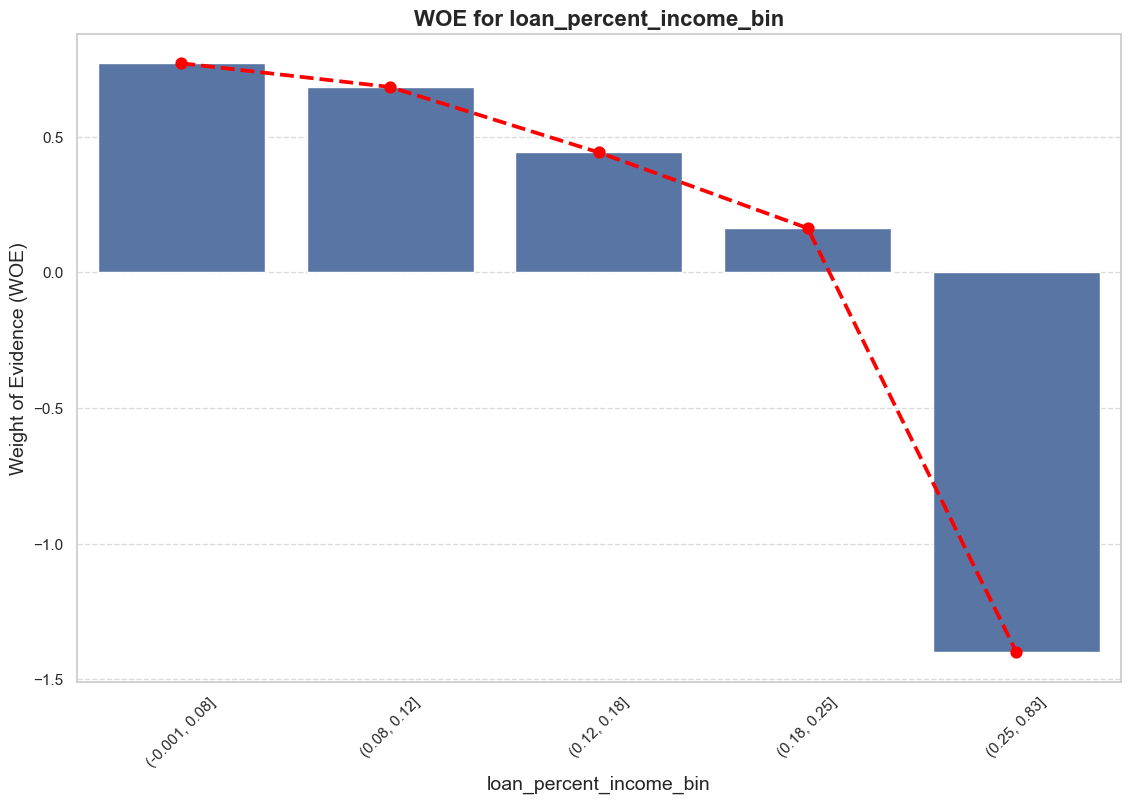

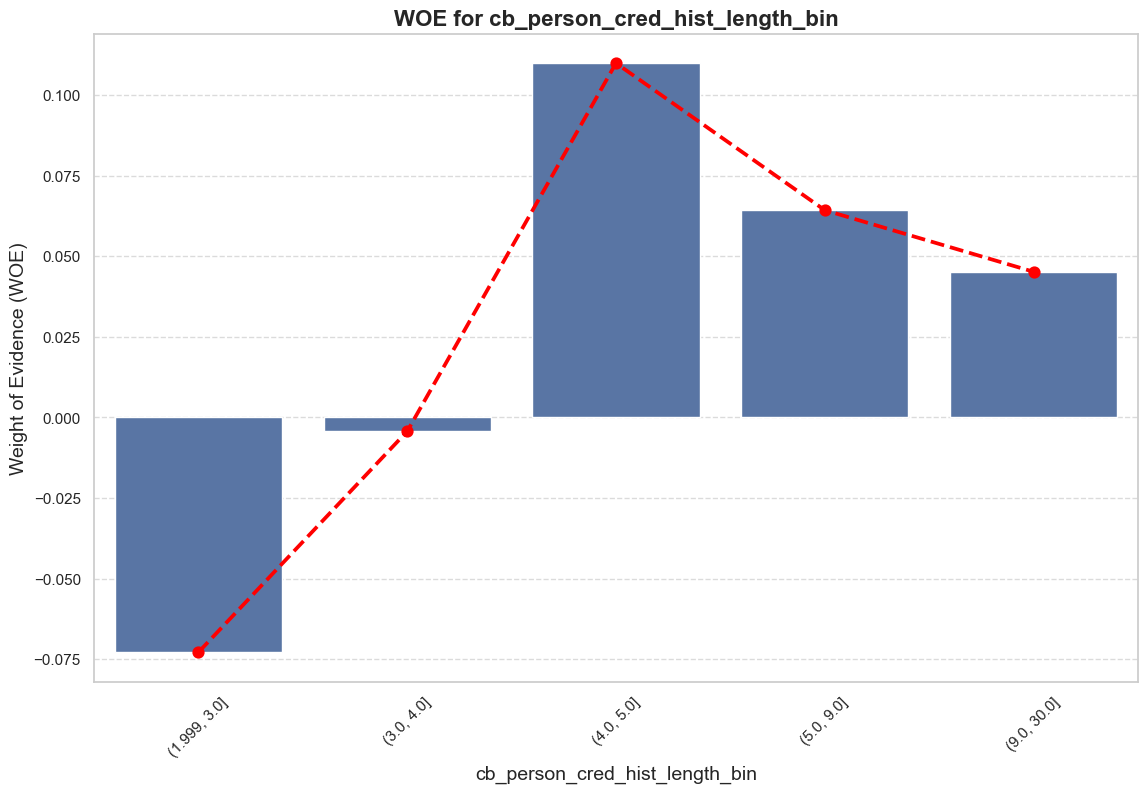

In [31]:
feature_names = WOE_df["Feature Name"].unique()
for feature in feature_names:
    filtered_WOE_df = WOE_df[WOE_df['Feature Name'] == feature]

    # Define the plot size and title
    plt.figure(figsize=(12, 8))
    plt.title(f'WOE for {feature}', fontsize=16, fontweight='bold')

    # Plot the WOE using barplot for better visualization
    barplot = sns.barplot(x='Feature Value', y='WoE', data=filtered_WOE_df)
    pointplot = sns.pointplot(x='Feature Value', y='WoE', data=filtered_WOE_df, linestyles='--', color="red", markers="o")

    # Rotate the label of x-axis for better readability
    plt.xticks(rotation=45)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Weight of Evidence (WOE)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()


## 4. Replace the Feature Values with WoE

In [32]:
WOE_df

,Feature Name,Feature Value,WoE
0,person_home_ownership,MORTGAGE,0.679659
1,person_home_ownership,OTHER,-0.549400
2,person_home_ownership,OWN,1.262009
3,person_home_ownership,RENT,-0.507538
4,loan_intent,DEBTCONSOLIDATION,-0.323396
5,loan_intent,EDUCATION,0.277027
6,loan_intent,HOMEIMPROVEMENT,-0.230444
7,loan_intent,MEDICAL,-0.272080
8,loan_intent,PERSONAL,0.097897
9,loan_intent,VENTURE,0.469865


In [49]:
feature_names = WOE_df["Feature Name"].unique()
woe_dict_map = {}
for feature_name in feature_names:
    filtered_WOE_df = WOE_df[WOE_df["Feature Name"]==feature_name]
    woe_dict_map[feature_name] = filtered_WOE_df.drop(columns=["Feature Name"]).set_index("Feature Value").to_dict()["WoE"]

In [65]:
woe_dict_map

{'person_home_ownership': {'MORTGAGE': 0.6796594201186501,
  'OTHER': -0.5494001420876587,
  'OWN': 1.2620088676912748,
  'RENT': -0.507537540861058},
 'loan_intent': {'DEBTCONSOLIDATION': -0.3233961473501174,
  'EDUCATION': 0.27702720116363105,
  'HOMEIMPROVEMENT': -0.2304441874042834,
  'MEDICAL': -0.2720802612066628,
  'PERSONAL': 0.09789655373307285,
  'VENTURE': 0.46986534572847405},
 'loan_grade': {'A': 0.9183292973635304,
  'B': 0.3483449823287176,
  'C': 0.08188820517434238,
  'D': -1.6544516409028416,
  'E': -1.8549668853238697,
  'F': -2.1855711167188283,
  'G': -5.037648990016848},
 'cb_person_default_on_file': {'N': 0.21282855851210836,
  'Y': -0.7738271211693333},
 'person_age_bin': {Interval(19.999, 23.0, closed='right'): -0.1215242745737818,
  Interval(23.0, 25.0, closed='right'): 0.006518968643743249,
  Interval(25.0, 27.0, closed='right'): 0.049261238842137456,
  Interval(27.0, 32.0, closed='right'): 0.07891633325666864,
  Interval(32.0, 144.0, closed='right'): 0.05456

In [117]:
train_dummy = train.copy()

def add_woe(value, woe_dict_map):
    woe_value = None
    if pd.isna(value):
        woe_value = woe_dict_map.get("Missing", None)
    else:
        for interval, woe in woe_dict_map.items():
            if isinstance(interval, pd.Interval) and value in interval:
                woe_value = woe
    return woe_value
        

# train
for col in train_dummy.select_dtypes("number").columns:
    if col != "loan_status":
        train_dummy[col] = train_dummy[col].apply(lambda x: add_woe(x, woe_dict_map[col+"_bin"]))

for col in train_dummy.select_dtypes("object").columns:
    if col != "loan_status":
        train_dummy[col] = train_dummy[col].replace(woe_dict_map[col])
        
# test
test_dummy = test.copy()
for col in test_dummy.select_dtypes("number").columns:
    if col != "loan_status":
        test_dummy[col] = test_dummy[col].apply(lambda x: add_woe(x, woe_dict_map[col+"_bin"]))

for col in test_dummy.select_dtypes("object").columns:
    if col != "loan_status":
        test_dummy[col] = test_dummy[col].replace(woe_dict_map[col])

# Modelling